In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point, Polygon

In [2]:
df = pd.read_csv('Housing_Maintenance_Code_Violations_20231206.csv')

/var/folders/m9/vz1tzq8j7rldj2225vbbzpfh0000gn/T/ipykernel_15455/1998241858.py:1: DtypeWarning: Columns (10,12,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Housing_Maintenance_Code_Violations_20231206.csv')


In [3]:
df.head()

ViolationID  BuildingID  RegistrationID  BoroID        Borough HouseNumber  \
0     10034143      629900          400688       4         QUEENS       77-54   
1     10034171      629900          400688       4         QUEENS       77-54   
2     10797937       94244          203084       2          BRONX        2136   
3     10018078      879456               0       5  STATEN ISLAND         129   
4     10018080      879456               0       5  STATEN ISLAND         129   

  LowHouseNumber HighHouseNumber     StreetName  StreetCode  ...  \
0          77-44           77-54  AUSTIN STREET       28990  ...   
1          77-44           77-54  AUSTIN STREET       28990  ...   
2           2136            2136   MAPES AVENUE       49120  ...   
3            129             129  SENECA STREET       47450  ...   
4            129             129  SENECA STREET       47450  ...   

  ViolationStatus RentImpairing   Latitude  Longitude  CommunityBoard  \
0           Close             N  40.714368 -73.835218             6.0   
1           Close             N  40.714368 -73.835218             6.0   
2           Close             N  40.847751 -73.884561             6.0   
3           Close             N  40.631619 -74.117918             1.0   
4           Close             N  40.631619 -74.117918             1.0   

  CouncilDistrict CensusTract        BIN           BBL  \
0            29.0     76901.0  4079660.0  4.033340e+09   
1            29.0     76901.0  4079660.0  4.033340e+09   
2            15.0     36501.0  2013000.0  2.031110e+09   
3            49.0       125.0  5147984.0  5.002160e+09   
4            49.0       125.0  5147984.0  5.002160e+09   

                                         NTA  
0                               Forest Hills  
1                               Forest Hills  
2                               East Tremont  
3  West New Brighton-New Brighton-St. George  
4  West New Brighton-New Brighton-St. George  

[5 rows x 41 columns]

In [4]:
df.tail()

ViolationID  BuildingID  RegistrationID  BoroID Borough HouseNumber  \
8631980      9578786      101364          213121       2   BRONX        4683   
8631981      9606919      101364          213121       2   BRONX        4683   
8631982      9878978      101364          213121       2   BRONX        4683   
8631983      9993101      101364          213121       2   BRONX        4683   
8631984      9999086      101364          213121       2   BRONX        4683   

        LowHouseNumber HighHouseNumber   StreetName  StreetCode  ...  \
8631980           4683            4683  PARK AVENUE       56820  ...   
8631981           4683            4683  PARK AVENUE       56820  ...   
8631982           4683            4683  PARK AVENUE       56820  ...   
8631983           4683            4683  PARK AVENUE       56820  ...   
8631984           4683            4683  PARK AVENUE       56820  ...   

        ViolationStatus RentImpairing   Latitude  Longitude  CommunityBoard  \
8631980           Close             N  40.858699 -73.892513             6.0   
8631981           Close             Y  40.858699 -73.892513             6.0   
8631982           Close             N  40.858699 -73.892513             6.0   
8631983           Close             N  40.858699 -73.892513             6.0   
8631984           Close             N  40.858699 -73.892513             6.0   

        CouncilDistrict CensusTract        BIN           BBL      NTA  
8631980            15.0     38304.0  2011229.0  2.030320e+09  Belmont  
8631981            15.0     38304.0  2011229.0  2.030320e+09  Belmont  
8631982            15.0     38304.0  2011229.0  2.030320e+09  Belmont  
8631983            15.0     38304.0  2011229.0  2.030320e+09  Belmont  
8631984            15.0     38304.0  2011229.0  2.030320e+09  Belmont  

[5 rows x 41 columns]

In [5]:
# column types
df.dtypes

ViolationID                int64
BuildingID                 int64
RegistrationID             int64
BoroID                     int64
Borough                   object
HouseNumber               object
LowHouseNumber            object
HighHouseNumber           object
StreetName                object
StreetCode                 int64
Postcode                  object
Apartment                 object
Story                     object
Block                      int64
Lot                        int64
Class                     object
InspectionDate            object
ApprovedDate              object
OriginalCertifyByDate     object
OriginalCorrectByDate     object
NewCertifyByDate          object
NewCorrectByDate          object
CertifiedDate             object
OrderNumber               object
NOVID                    float64
NOVDescription            object
NOVIssuedDate             object
CurrentStatusID            int64
CurrentStatus             object
CurrentStatusDate         object
NovType   

In [6]:
df['InspectionDate']

0          11/12/2013
1          11/12/2013
2          07/27/2015
3          10/25/2013
4          10/25/2013
              ...    
8631980    09/18/2012
8631981    10/11/2012
8631982    06/20/2013
8631983    10/02/2013
8631984    10/07/2013
Name: InspectionDate, Length: 8631985, dtype: object

In [7]:
df['ApprovedDate']

0          11/13/2013
1          11/13/2013
2          07/28/2015
3          10/25/2013
4          10/28/2013
              ...    
8631980    09/19/2012
8631981    10/11/2012
8631982    06/24/2013
8631983    10/02/2013
8631984    10/08/2013
Name: ApprovedDate, Length: 8631985, dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8631985 entries, 0 to 8631984
Data columns (total 41 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ViolationID            int64  
 1   BuildingID             int64  
 2   RegistrationID         int64  
 3   BoroID                 int64  
 4   Borough                object 
 5   HouseNumber            object 
 6   LowHouseNumber         object 
 7   HighHouseNumber        object 
 8   StreetName             object 
 9   StreetCode             int64  
 10  Postcode               object 
 11  Apartment              object 
 12  Story                  object 
 13  Block                  int64  
 14  Lot                    int64  
 15  Class                  object 
 16  InspectionDate         object 
 17  ApprovedDate           object 
 18  OriginalCertifyByDate  object 
 19  OriginalCorrectByDate  object 
 20  NewCertifyByDate       object 
 21  NewCorrectByDate       object 
 22  CertifiedDate     

In [9]:
## experiment
df_experiment = pd.read_csv('Housing_Maintenance_Code_Violations_20231206.csv', parse_dates={'datetime':[16,21]})

/var/folders/m9/vz1tzq8j7rldj2225vbbzpfh0000gn/T/ipykernel_15455/754524505.py:2: DtypeWarning: Columns (10,12,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_experiment = pd.read_csv('Housing_Maintenance_Code_Violations_20231206.csv', parse_dates={'datetime':[16,21]})


In [10]:
df_experiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8631985 entries, 0 to 8631984
Data columns (total 40 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   datetime               object 
 1   ViolationID            int64  
 2   BuildingID             int64  
 3   RegistrationID         int64  
 4   BoroID                 int64  
 5   Borough                object 
 6   HouseNumber            object 
 7   LowHouseNumber         object 
 8   HighHouseNumber        object 
 9   StreetName             object 
 10  StreetCode             int64  
 11  Postcode               object 
 12  Apartment              object 
 13  Story                  object 
 14  Block                  int64  
 15  Lot                    int64  
 16  Class                  object 
 17  ApprovedDate           object 
 18  OriginalCertifyByDate  object 
 19  OriginalCorrectByDate  object 
 20  NewCertifyByDate       object 
 21  CertifiedDate          object 
 22  OrderNumber       

In [11]:
df_experiment['datetime']

0          11/12/2013 nan
1          11/12/2013 nan
2          07/27/2015 nan
3          10/25/2013 nan
4          10/25/2013 nan
                ...      
8631980    09/18/2012 nan
8631981    10/11/2012 nan
8631982    06/20/2013 nan
8631983    10/02/2013 nan
8631984    10/07/2013 nan
Name: datetime, Length: 8631985, dtype: object

In [12]:
# convert column to a datetype - InspectionDate, ApprovedDate, 
# OriginalCertifyByDate, OriginalCorrectByDate, CertifiedDate, 
# NOVIssuedDate, CurrentStatus
    # could be done by a for loop
df['InspectionDate'] = pd.to_datetime(df['InspectionDate'],errors = 'coerce', format='%-m/%d/%Y %H:%M:%S')
df['ApprovedDate'] = pd.to_datetime(df['ApprovedDate'],errors = 'coerce', format='%B %d, %Y')
df['OriginalCertifyByDate'] = pd.to_datetime(df['OriginalCertifyByDate'],errors = 'coerce', format='%B %d, %Y')
df['OriginalCorrectByDate'] = pd.to_datetime(df['OriginalCorrectByDate'],errors = 'coerce', format='%B %d, %Y')
df['NewCertifyByDate'] = pd.to_datetime(df['NewCertifyByDate'],errors = 'coerce', format='%B %d, %Y')
df['NewCorrectByDate'] = pd.to_datetime(df['NewCorrectByDate'],errors = 'coerce', format='%B %d, %Y')
df['CertifiedDate'] = pd.to_datetime(df['CertifiedDate'],errors = 'coerce', format='%B %d, %Y')
df['NOVIssuedDate'] = pd.to_datetime(df['NOVIssuedDate'],errors = 'coerce', format='%B %d, %Y')
df['CurrentStatusDate'] = pd.to_datetime(df['CurrentStatusDate'],errors = 'coerce', format='%B %d, %Y')

df.dtypes

ViolationID                       int64
BuildingID                        int64
RegistrationID                    int64
BoroID                            int64
Borough                          object
HouseNumber                      object
LowHouseNumber                   object
HighHouseNumber                  object
StreetName                       object
StreetCode                        int64
Postcode                         object
Apartment                        object
Story                            object
Block                             int64
Lot                               int64
Class                            object
InspectionDate           datetime64[ns]
ApprovedDate             datetime64[ns]
OriginalCertifyByDate    datetime64[ns]
OriginalCorrectByDate    datetime64[ns]
NewCertifyByDate         datetime64[ns]
NewCorrectByDate         datetime64[ns]
CertifiedDate            datetime64[ns]
OrderNumber                      object
NOVID                           float64


In [13]:
# check what the date looks like
df['InspectionDate']

0         NaT
1         NaT
2         NaT
3         NaT
4         NaT
           ..
8631980   NaT
8631981   NaT
8631982   NaT
8631983   NaT
8631984   NaT
Name: InspectionDate, Length: 8631985, dtype: datetime64[ns]

In [14]:
# organize database based on date time from most recent to least recent date
# descending order
df = df.sort_values(by=['InspectionDate', 'ApprovedDate', 'OriginalCertifyByDate', 'OriginalCorrectByDate',
                       'NewCertifyByDate', 'NewCorrectByDate','CertifiedDate', 'NOVIssuedDate', 'CurrentStatusDate'], ascending = False)

In [15]:
# check for missing values in the database
df.isnull().sum()

ViolationID                    0
BuildingID                     0
RegistrationID                 0
BoroID                         0
Borough                        0
HouseNumber                    0
LowHouseNumber              1450
HighHouseNumber                0
StreetName                     0
StreetCode                     0
Postcode                    6696
Apartment                2800249
Story                    1567135
Block                          0
Lot                            0
Class                          0
InspectionDate           8631985
ApprovedDate             8631985
OriginalCertifyByDate    8631985
OriginalCorrectByDate    8631985
NewCertifyByDate         8631985
NewCorrectByDate         8631985
CertifiedDate            8631985
OrderNumber                    0
NOVID                     673523
NOVDescription                20
NOVIssuedDate            8631985
CurrentStatusID                0
CurrentStatus                  0
CurrentStatusDate        8631985
NovType   

In [16]:
# DEBUG
#make copy of database from the last 2 years 
    # 2021-12-06 (6 December 2021) to 2023-12-06 (6 December 2023)
df2 = df.loc[(df['InspectionDate'] >= '2021-12-05') & (df['InspectionDate'] < '2023-12-05')]
    # individual year - debug !!
#df3 = df.loc[(df['InspectionDate'] >= "2021-12-05") & (df['InspectionDate' < '2022-12-05'])]
#df4 = df.loc[(df['InspectionDate'] >= "2022-12-05") & (df['InspectionDate' < '2023-12-05'])]

In [17]:
# CHECK TYPES ON THE DF2
df2.dtypes

ViolationID                       int64
BuildingID                        int64
RegistrationID                    int64
BoroID                            int64
Borough                          object
HouseNumber                      object
LowHouseNumber                   object
HighHouseNumber                  object
StreetName                       object
StreetCode                        int64
Postcode                         object
Apartment                        object
Story                            object
Block                             int64
Lot                               int64
Class                            object
InspectionDate           datetime64[ns]
ApprovedDate             datetime64[ns]
OriginalCertifyByDate    datetime64[ns]
OriginalCorrectByDate    datetime64[ns]
NewCertifyByDate         datetime64[ns]
NewCorrectByDate         datetime64[ns]
CertifiedDate            datetime64[ns]
OrderNumber                      object
NOVID                           float64


In [18]:
# DEBUG - check for missing values in df2
df2.isnull().sum() 
# no missing values

ViolationID              0.0
BuildingID               0.0
RegistrationID           0.0
BoroID                   0.0
Borough                  0.0
HouseNumber              0.0
LowHouseNumber           0.0
HighHouseNumber          0.0
StreetName               0.0
StreetCode               0.0
Postcode                 0.0
Apartment                0.0
Story                    0.0
Block                    0.0
Lot                      0.0
Class                    0.0
InspectionDate           0.0
ApprovedDate             0.0
OriginalCertifyByDate    0.0
OriginalCorrectByDate    0.0
NewCertifyByDate         0.0
NewCorrectByDate         0.0
CertifiedDate            0.0
OrderNumber              0.0
NOVID                    0.0
NOVDescription           0.0
NOVIssuedDate            0.0
CurrentStatusID          0.0
CurrentStatus            0.0
CurrentStatusDate        0.0
NovType                  0.0
ViolationStatus          0.0
RentImpairing            0.0
Latitude                 0.0
Longitude     

In [19]:
# remove columns LowHouseNumber, HighHouseNumber, BoroID, BuildingID
columns = ['LowHouseNumber', 'HighHouseNumber', 'BoroID', 'BIN', 'BBL' ,'NewCorrectByDate', 
          'NewCertifyByDate', 'OriginalCorrectByDate', 'OriginalCertifyByDate']
df2 = df.drop(columns = columns)
df2.dtypes

ViolationID                   int64
BuildingID                    int64
RegistrationID                int64
Borough                      object
HouseNumber                  object
StreetName                   object
StreetCode                    int64
Postcode                     object
Apartment                    object
Story                        object
Block                         int64
Lot                           int64
Class                        object
InspectionDate       datetime64[ns]
ApprovedDate         datetime64[ns]
CertifiedDate        datetime64[ns]
OrderNumber                  object
NOVID                       float64
NOVDescription               object
NOVIssuedDate        datetime64[ns]
CurrentStatusID               int64
CurrentStatus                object
CurrentStatusDate    datetime64[ns]
NovType                      object
ViolationStatus              object
RentImpairing                object
Latitude                    float64
Longitude                   

In [20]:
# debug
df2.head()

ViolationID  BuildingID  RegistrationID        Borough HouseNumber  \
0     10034143      629900          400688         QUEENS       77-54   
1     10034171      629900          400688         QUEENS       77-54   
2     10797937       94244          203084          BRONX        2136   
3     10018078      879456               0  STATEN ISLAND         129   
4     10018080      879456               0  STATEN ISLAND         129   

      StreetName  StreetCode Postcode Apartment Story  ...  CurrentStatusDate  \
0  AUSTIN STREET       28990  11375.0        4A     4  ...                NaT   
1  AUSTIN STREET       28990  11375.0        4A     4  ...                NaT   
2   MAPES AVENUE       49120  10460.0        C4     3  ...                NaT   
3  SENECA STREET       47450  10310.0       129     1  ...                NaT   
4  SENECA STREET       47450  10310.0       129     1  ...                NaT   

    NovType ViolationStatus RentImpairing   Latitude  Longitude  \
0  Original           Close             N  40.714368 -73.835218   
1  Original           Close             N  40.714368 -73.835218   
2  Original           Close             N  40.847751 -73.884561   
3  Original           Close             N  40.631619 -74.117918   
4  Original           Close             N  40.631619 -74.117918   

  CommunityBoard  CouncilDistrict CensusTract  \
0            6.0             29.0     76901.0   
1            6.0             29.0     76901.0   
2            6.0             15.0     36501.0   
3            1.0             49.0       125.0   
4            1.0             49.0       125.0   

                                         NTA  
0                               Forest Hills  
1                               Forest Hills  
2                               East Tremont  
3  West New Brighton-New Brighton-St. George  
4  West New Brighton-New Brighton-St. George  

[5 rows x 32 columns]

In [21]:
# borough to number match 
# Boro code (1 = Manhattan, 2 = Bronx, 3 = Brooklyn, 4 = Queens, 5 = Staten Island)

In [22]:
# visualizations - Question 3: What day did the most violations occur?
df2['InspectionDate'].value_counts()

# skipped

Series([], Name: InspectionDate, dtype: int64)

In [23]:
df2.to_csv('HousingData_2021_2023.csv', index=False, encoding='utf-8')
#df3.to_csv('HousingData_2021_2022.csv', index=False, encoding = 'utf-8')
#df4.to_csv('HousingData_2022_2023.csv', index=False, encoding = 'utf-8')

Questions to ask:
1. Which boroughs do violations occur in the most overall?
2. Which neighborhood (NTA) has the most violations?
3. What day did the most violations occur?
4. Which class of violation occurs the most?
5. How many violations were rent impairing during [choose date]
6. Overtime, which building 

/var/folders/m9/vz1tzq8j7rldj2225vbbzpfh0000gn/T/ipykernel_15455/2329035886.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df2.corr()


<Axes: >

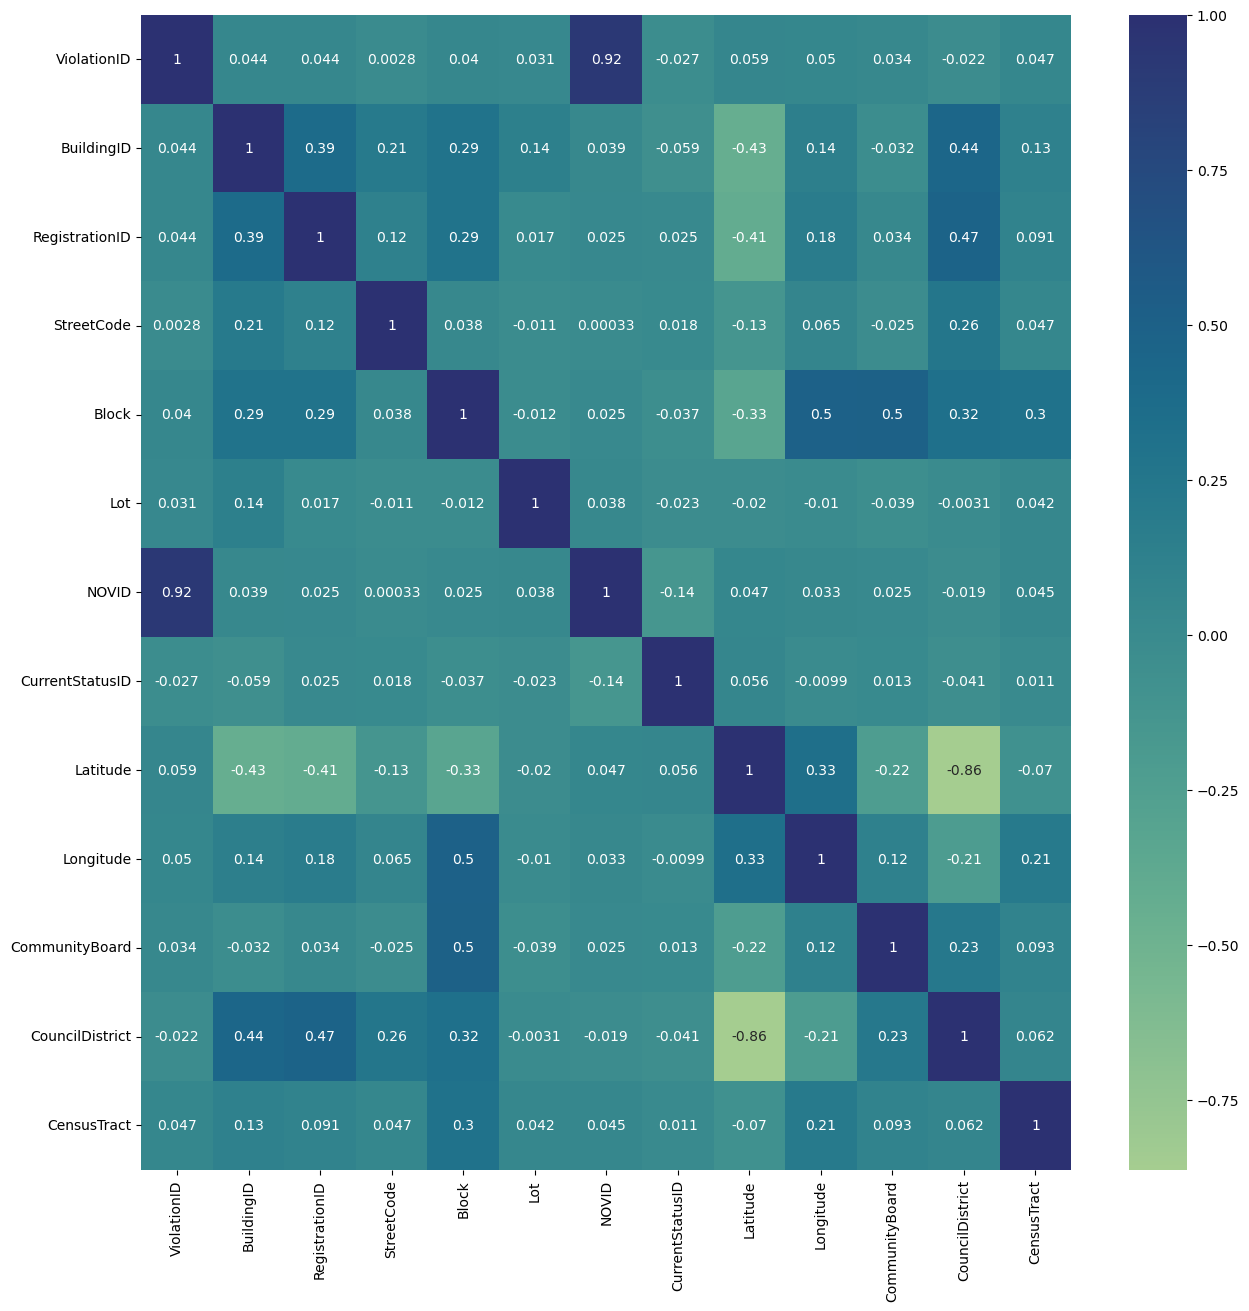

In [24]:
correlation = df2.corr()
# visualize correlation
plt.figure(figsize=(15,15))
sns.heatmap(correlation, annot=True, cmap='crest')

In [25]:
# zip map importation
zipCode_map = gpd.read_file('nyu_2451_34509.shp')

<Axes: >

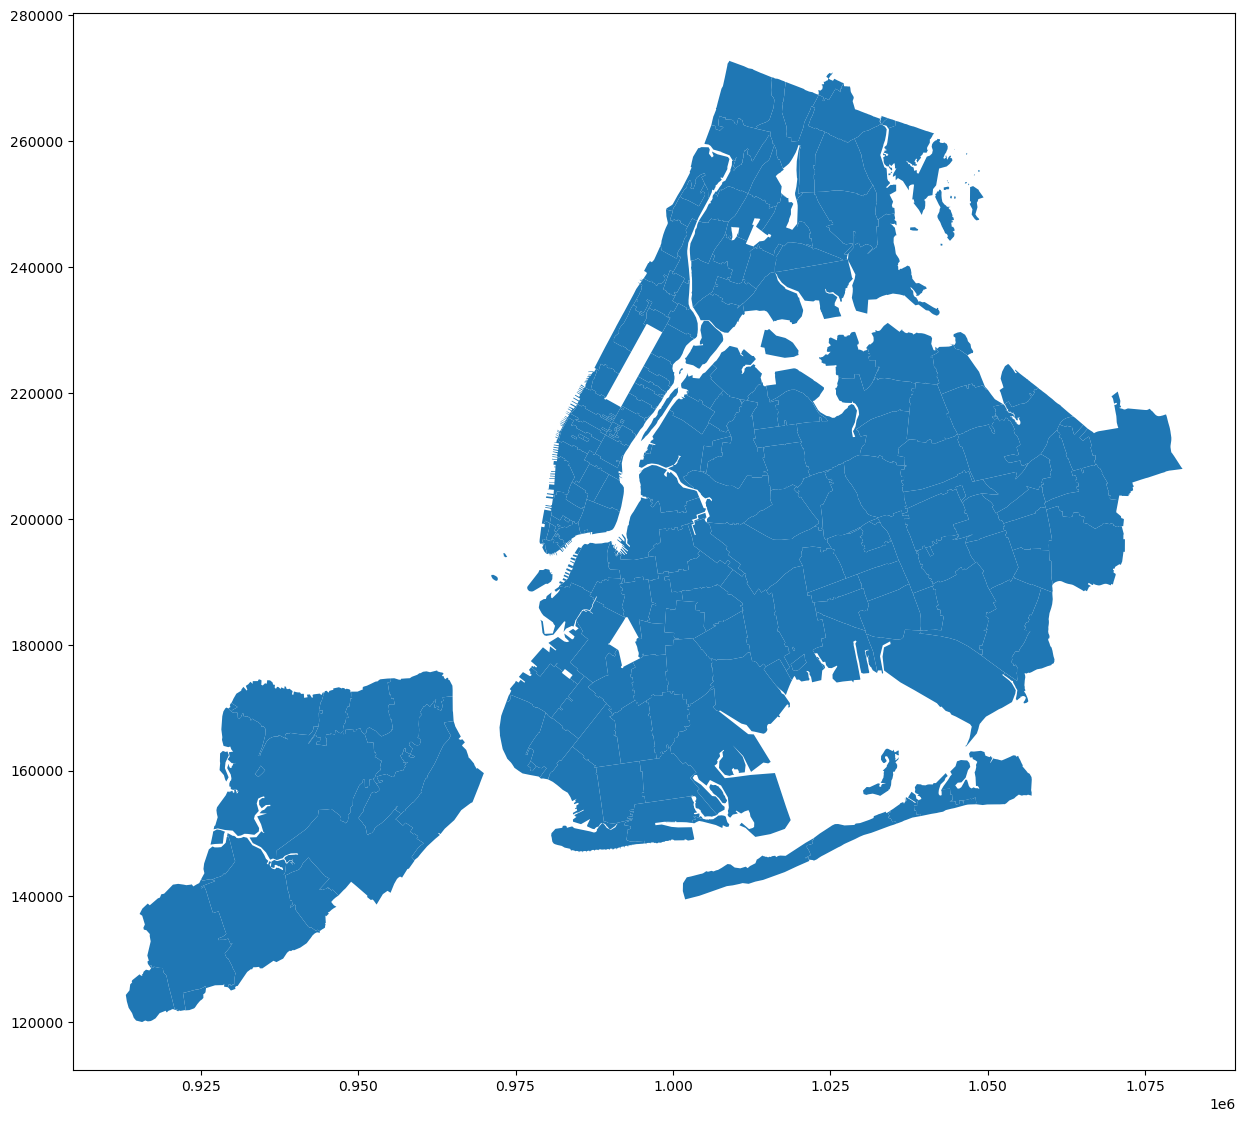

In [26]:
# plot of zip map
fig, ax = plt.subplots(figsize=(15,15))
zipCode_map.plot(ax=ax)

In [27]:
# get coordinate system
zipCode_map.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

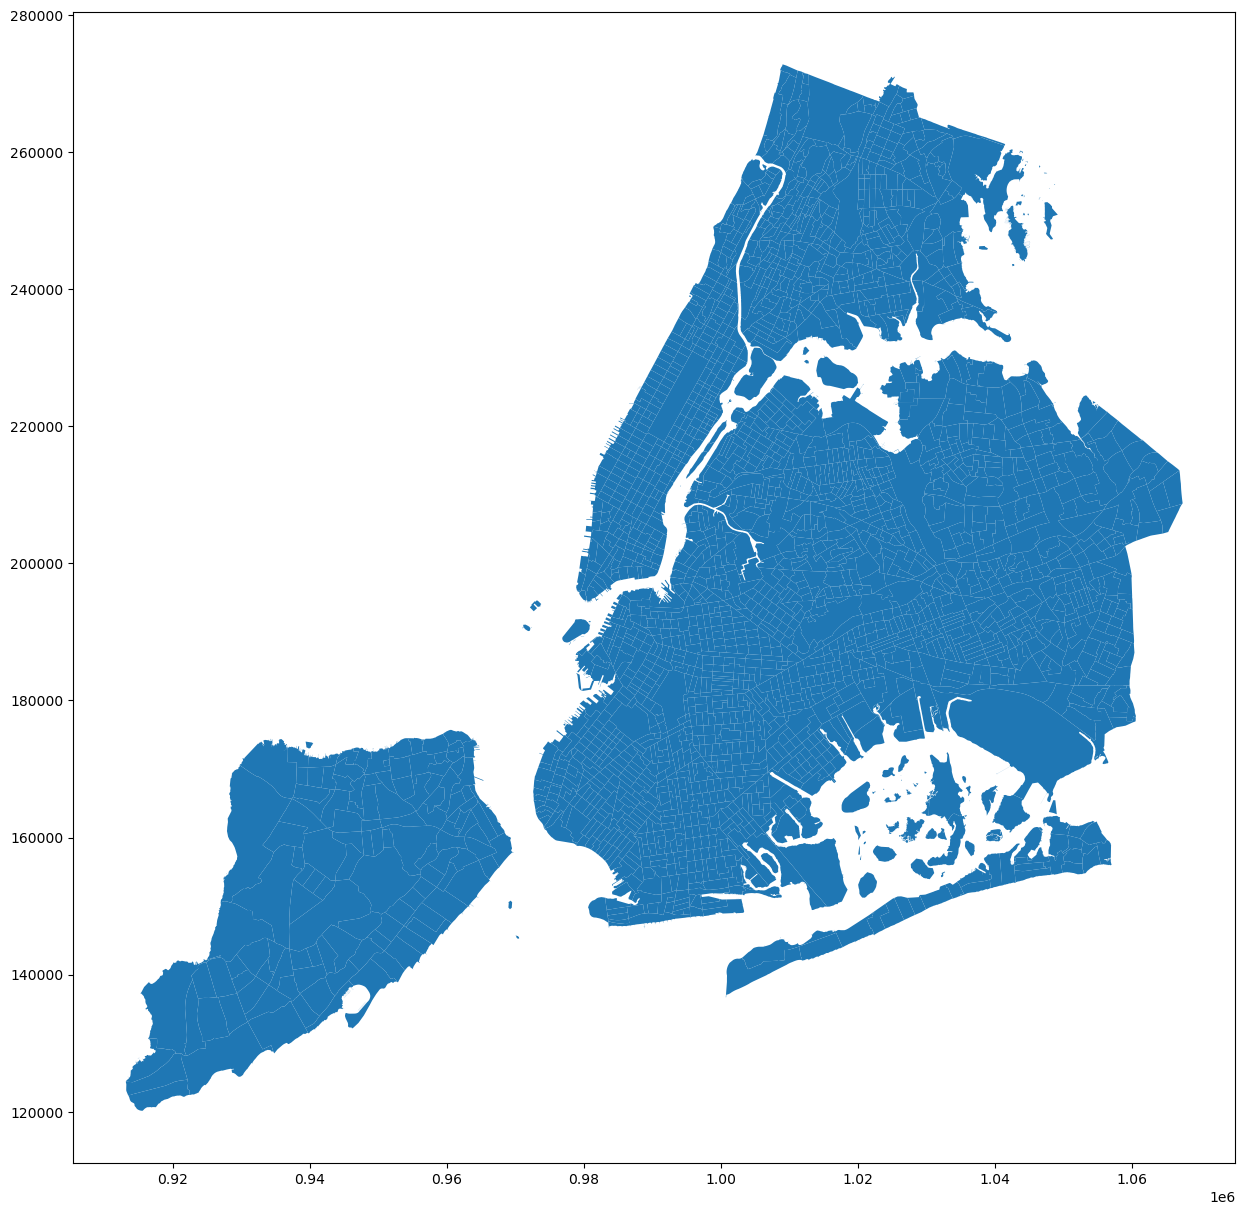

In [28]:
# census tract map
censusTract_map = gpd.read_file('nyct2020.shp')
fig, ax = plt.subplots(figsize=(15,15))
censusTract_map.plot(ax=ax)

In [29]:
# get coordinate system 
censusTract_map.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

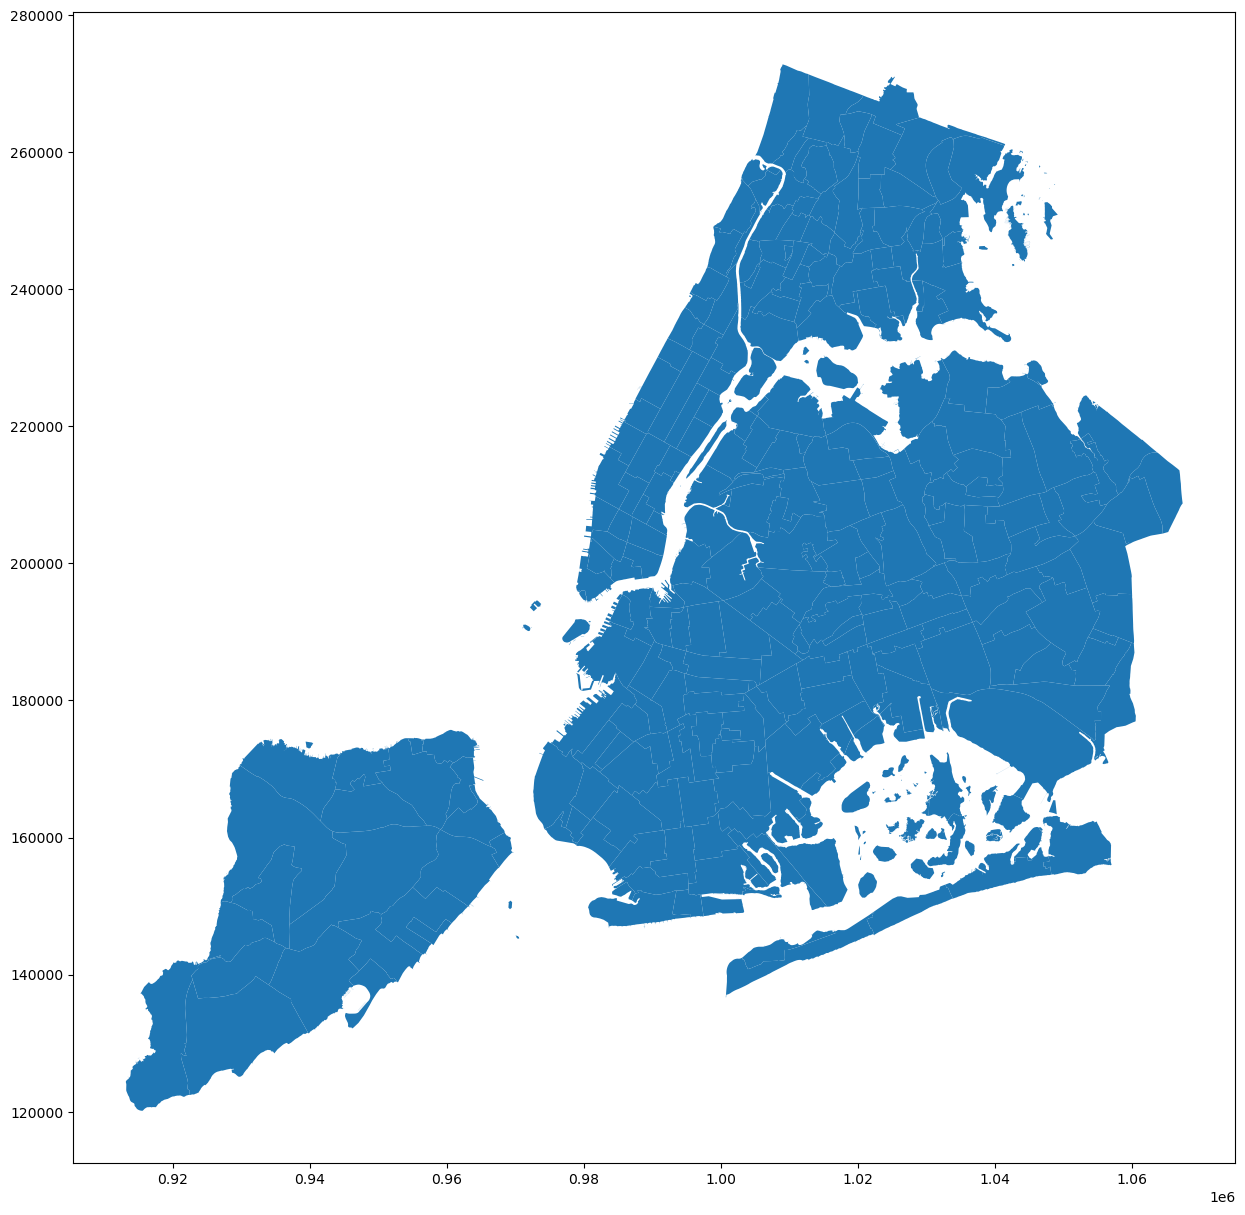

In [30]:
# NTA map
NTA_map = gpd.read_file('nynta2020.shp')
fig, ax = plt.subplots(figsize=(15,15))
NTA_map.plot(ax=ax)

In [31]:
# get coordinate system
NTA_map.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [32]:
# creation of geopandas dataframe
# source = https://stackoverflow.com/questions/38961816/geopandas-set-crs-on-points
geometry = [Point(xy) for xy in zip(df2['Longitude'], df2['Latitude'])]
geo_df = GeoDataFrame(df2, geometry=geometry)
geo_df.set_crs(epsg=2263, inplace=True)


ViolationID  BuildingID  RegistrationID        Borough HouseNumber  \
0           10034143      629900          400688         QUEENS       77-54   
1           10034171      629900          400688         QUEENS       77-54   
2           10797937       94244          203084          BRONX        2136   
3           10018078      879456               0  STATEN ISLAND         129   
4           10018080      879456               0  STATEN ISLAND         129   
...              ...         ...             ...            ...         ...   
8631980      9578786      101364          213121          BRONX        4683   
8631981      9606919      101364          213121          BRONX        4683   
8631982      9878978      101364          213121          BRONX        4683   
8631983      9993101      101364          213121          BRONX        4683   
8631984      9999086      101364          213121          BRONX        4683   

            StreetName  StreetCode Postcode Apartment Story  ...   NovType  \
0        AUSTIN STREET       28990  11375.0        4A     4  ...  Original   
1        AUSTIN STREET       28990  11375.0        4A     4  ...  Original   
2         MAPES AVENUE       49120  10460.0        C4     3  ...  Original   
3        SENECA STREET       47450  10310.0       129     1  ...  Original   
4        SENECA STREET       47450  10310.0       129     1  ...  Original   
...                ...         ...      ...       ...   ...  ...       ...   
8631980    PARK AVENUE       56820  10458.0       NaN   0.0  ...  Original   
8631981    PARK AVENUE       56820  10458.0       NaN   2.0  ...  Original   
8631982    PARK AVENUE       56820  10458.0       NaN   0.0  ...  Original   
8631983    PARK AVENUE       56820  10458.0        2B   2.0  ...  Original   
8631984    PARK AVENUE       56820  10458.0        1A   1.0  ...  Original   

         ViolationStatus RentImpairing   Latitude  Longitude CommunityBoard  \
0                  Close             N  40.714368 -73.835218            6.0   
1                  Close             N  40.714368 -73.835218            6.0   
2                  Close             N  40.847751 -73.884561            6.0   
3                  Close             N  40.631619 -74.117918            1.0   
4                  Close             N  40.631619 -74.117918            1.0   
...                  ...           ...        ...        ...            ...   
8631980            Close             N  40.858699 -73.892513            6.0   
8631981            Close             Y  40.858699 -73.892513            6.0   
8631982            Close             N  40.858699 -73.892513            6.0   
8631983            Close             N  40.858699 -73.892513            6.0   
8631984            Close             N  40.858699 -73.892513            6.0   

        CouncilDistrict  CensusTract  \
0                  29.0      76901.0   
1                  29.0      76901.0   
2                  15.0      36501.0   
3                  49.0        125.0   
4                  49.0        125.0   
...                 ...          ...   
8631980            15.0      38304.0   
8631981            15.0      38304.0   
8631982            15.0      38304.0   
8631983            15.0      38304.0   
8631984            15.0      38304.0   

                                               NTA                geometry  
0                                     Forest Hills  POINT (-73.835 40.714)  
1                                     Forest Hills  POINT (-73.835 40.714)  
2                                     East Tremont  POINT (-73.885 40.848)  
3        West New Brighton-New Brighton-St. George  POINT (-74.118 40.632)  
4        West New Brighton-New Brighton-St. George  POINT (-74.118 40.632)  
...                                            ...                     ...  
8631980                                    Belmont  POINT (-73.893 40.859)  
8631981                                    Belmont  POINT (-73.893 40.859)  


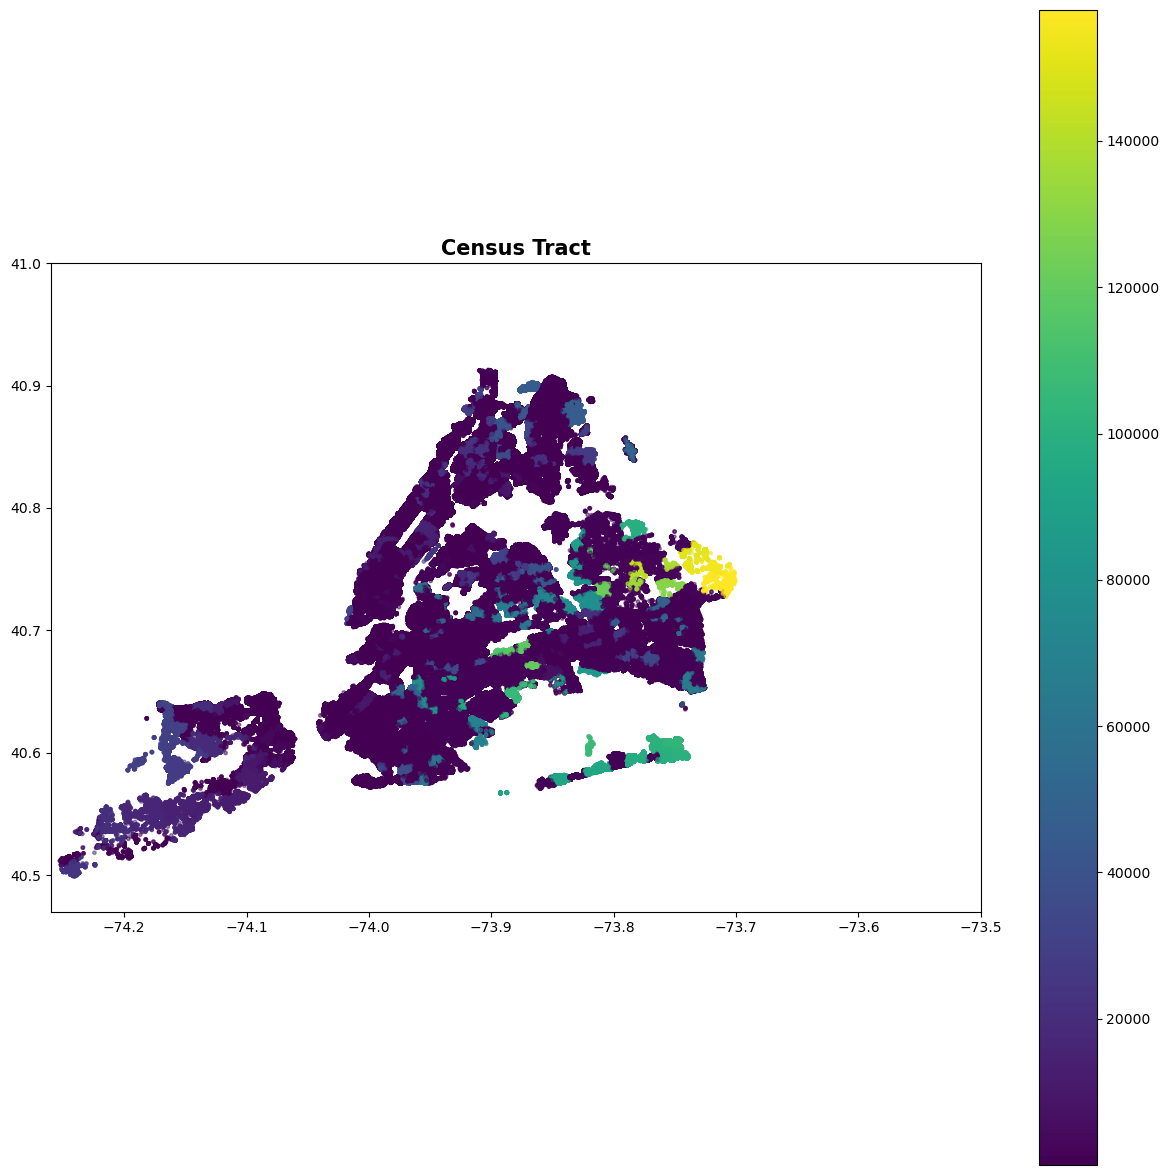

In [33]:
# test plot from the geopandas data
fig, ax = plt.subplots(figsize=(15,15))
censusTract_map.plot(ax=ax, alpha=0.4, color='grey')

geo_df.plot(column='CensusTract', ax=ax, alpha=0.5,
           legend=True, markersize=6)
# graph title
plt.title('Census Tract', fontsize=15, fontweight='bold')

#latitude and longitude boundaries for map display
plt.xlim(-74.26,-73.5)
plt.ylim(40.47,41)

#show map
plt.show()

In [34]:
geo_df['RentImpairing'].value_counts()

N    8049897
Y     582088
Name: RentImpairing, dtype: int64

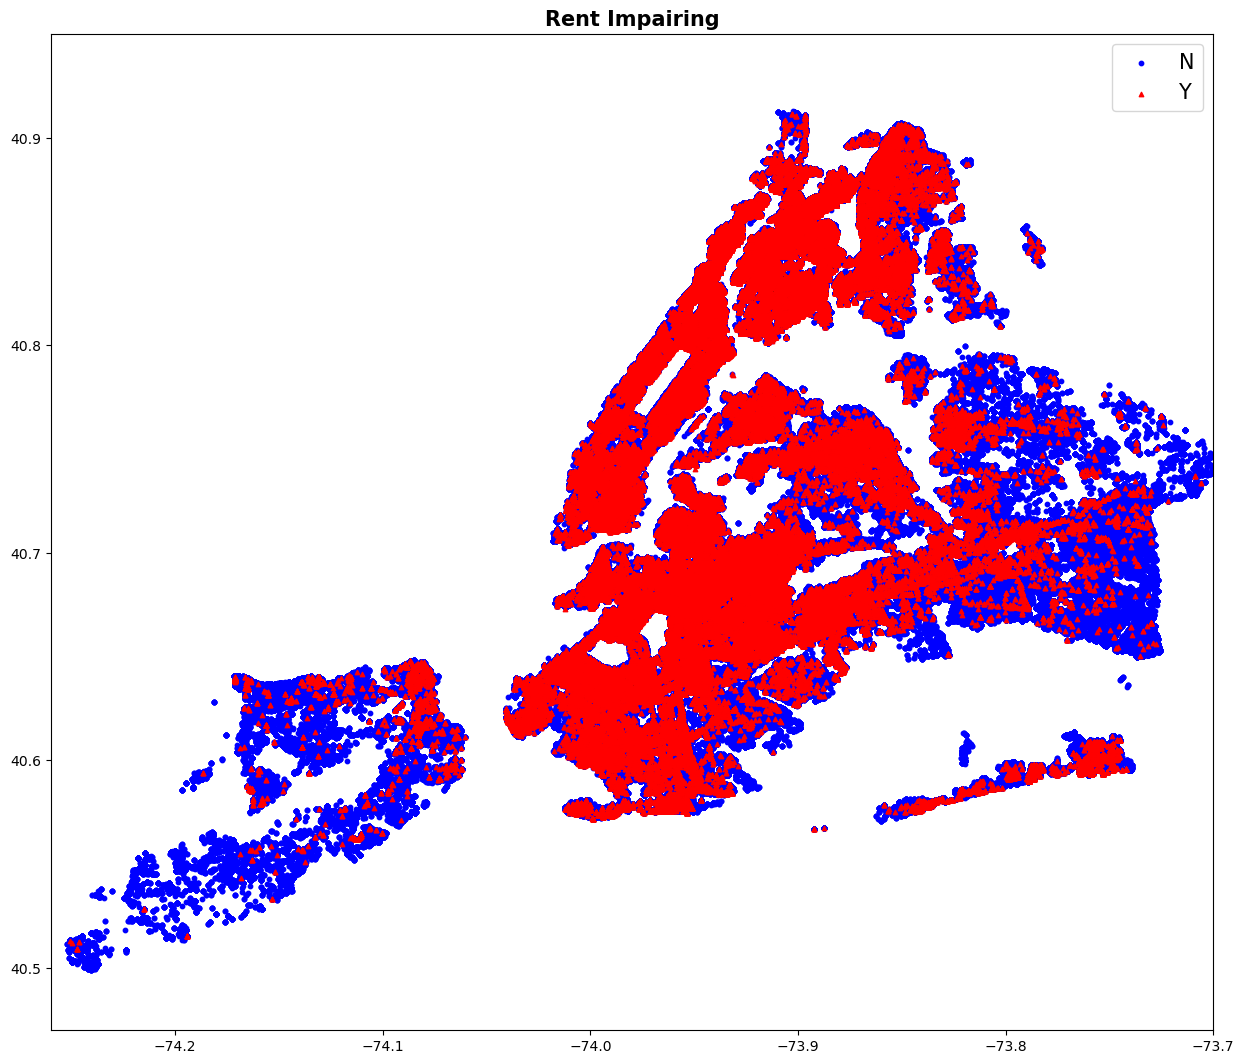

In [35]:
# plot rentimpairing category
fig, ax = plt.subplots(figsize=(15,15))
censusTract_map.plot(ax=ax, alpha=0.4, color='grey')

geo_df[geo_df['RentImpairing'] == 'N'].plot(ax=ax,
                                             markersize=10,
                                             color='blue', 
                                             marker='o',
                                             label='N')
geo_df[geo_df['RentImpairing'] == 'Y'].plot(ax=ax, 
                                             markersize = 10,
                                             color = 'red',
                                              marker='^',
                                            label='Y')
plt.legend(prop={'size':15})
plt.title('Rent Impairing', fontsize=15, fontweight='bold')

plt.xlim(-74.26,-73.7)
plt.ylim(40.47,40.95)

#show map
plt.show()

In [36]:
geo_df['ViolationStatus'].value_counts()

Close    5977990
Open     2653995
Name: ViolationStatus, dtype: int64

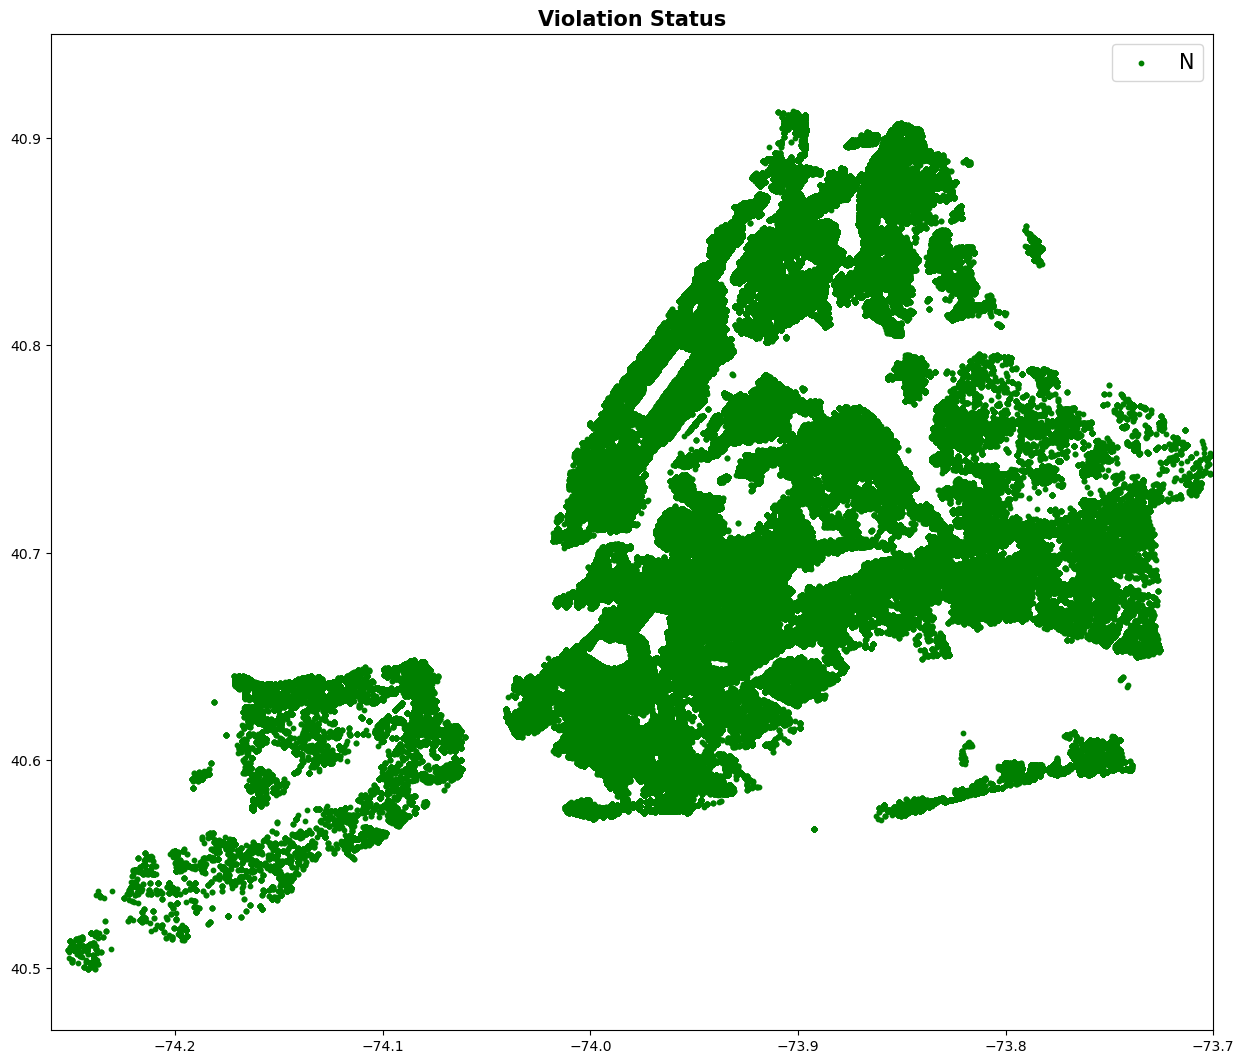

In [37]:
fig, ax = plt.subplots(figsize=(15,15))
censusTract_map.plot(ax=ax, alpha=0.4, color='grey')

geo_df[geo_df['ViolationStatus'] == 'Close'].plot(ax=ax,
                                             markersize=10,
                                             color='green', 
                                             marker='o',
                                             label='N')
#geo_df[geo_df['ViolationStatus'] == 'Open'].plot(ax=ax, 
                                             #markersize = 10,
                                             #color = 'purple',
                                              #marker='^',
                                            #label='Y')
plt.legend(prop={'size':15})
plt.title('Violation Status', fontsize=15, fontweight='bold')

#latitude and longitude boundaries for map display - DEBUG
plt.xlim(-74.26,-73.7)
plt.ylim(40.47,40.95)

#show map
plt.show()

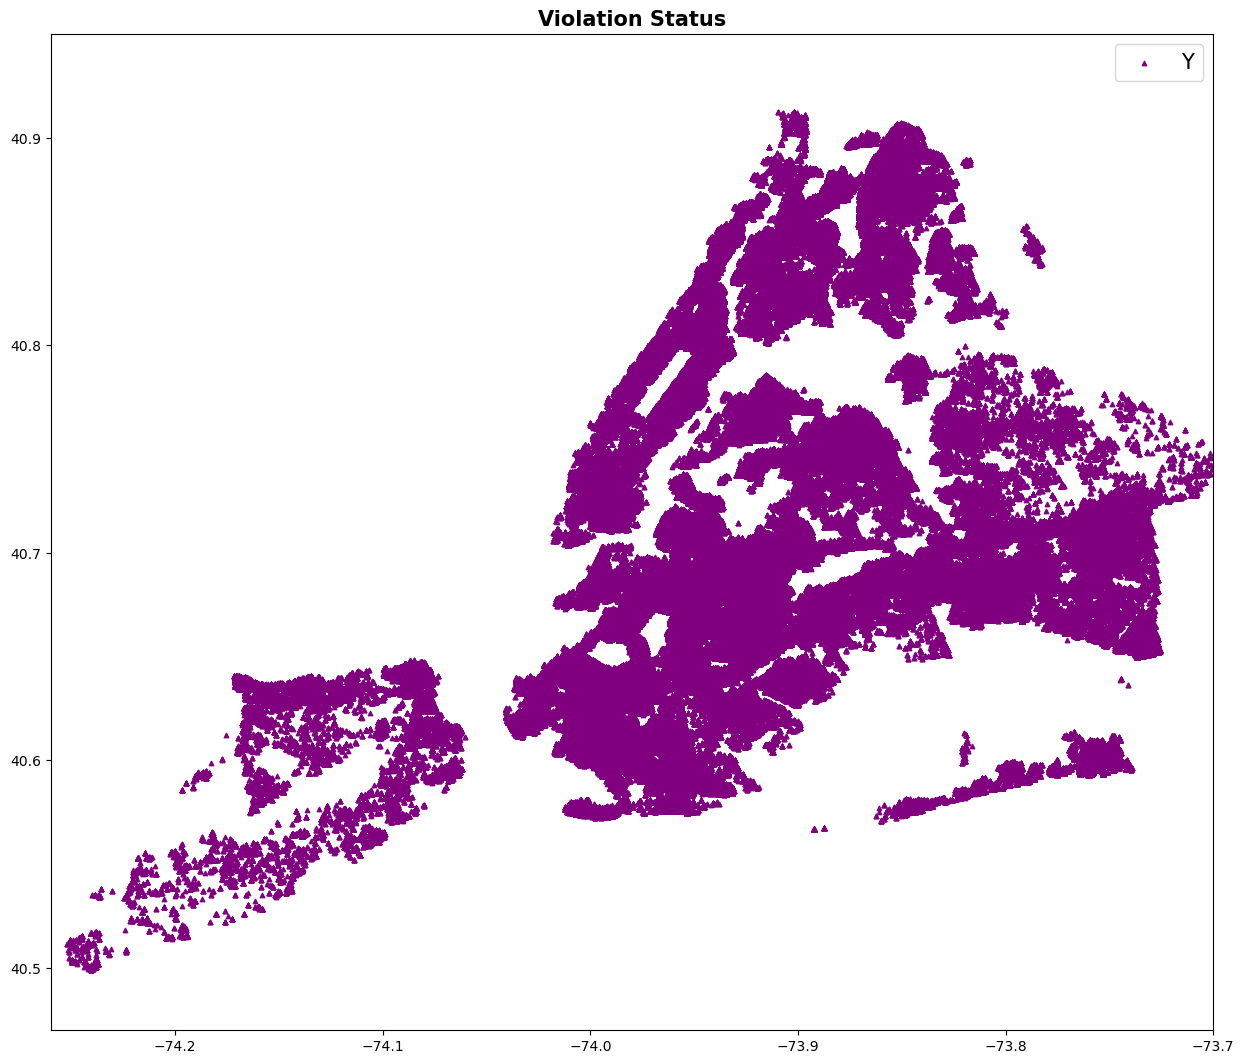

In [38]:
fig, ax = plt.subplots(figsize=(15,15))
censusTract_map.plot(ax=ax, alpha=0.4, color='grey')
#geo_df[geo_df['ViolationStatus'] == 'Close'].plot(ax=ax,
                                             #markersize=10,
                                             #color='green', 
                                             #marker='o',
                                             #label='N')
geo_df[geo_df['ViolationStatus'] == 'Open'].plot(ax=ax, 
                                             markersize = 10,
                                             color = 'purple',
                                              marker='^',
                                            label='Y')
plt.legend(prop={'size':15})
plt.title('Violation Status', fontsize=15, fontweight='bold')

#latitude and longitude boundaries for map display - DEBUG
plt.xlim(-74.26,-73.7)
plt.ylim(40.47,40.95)

#show map
plt.show()


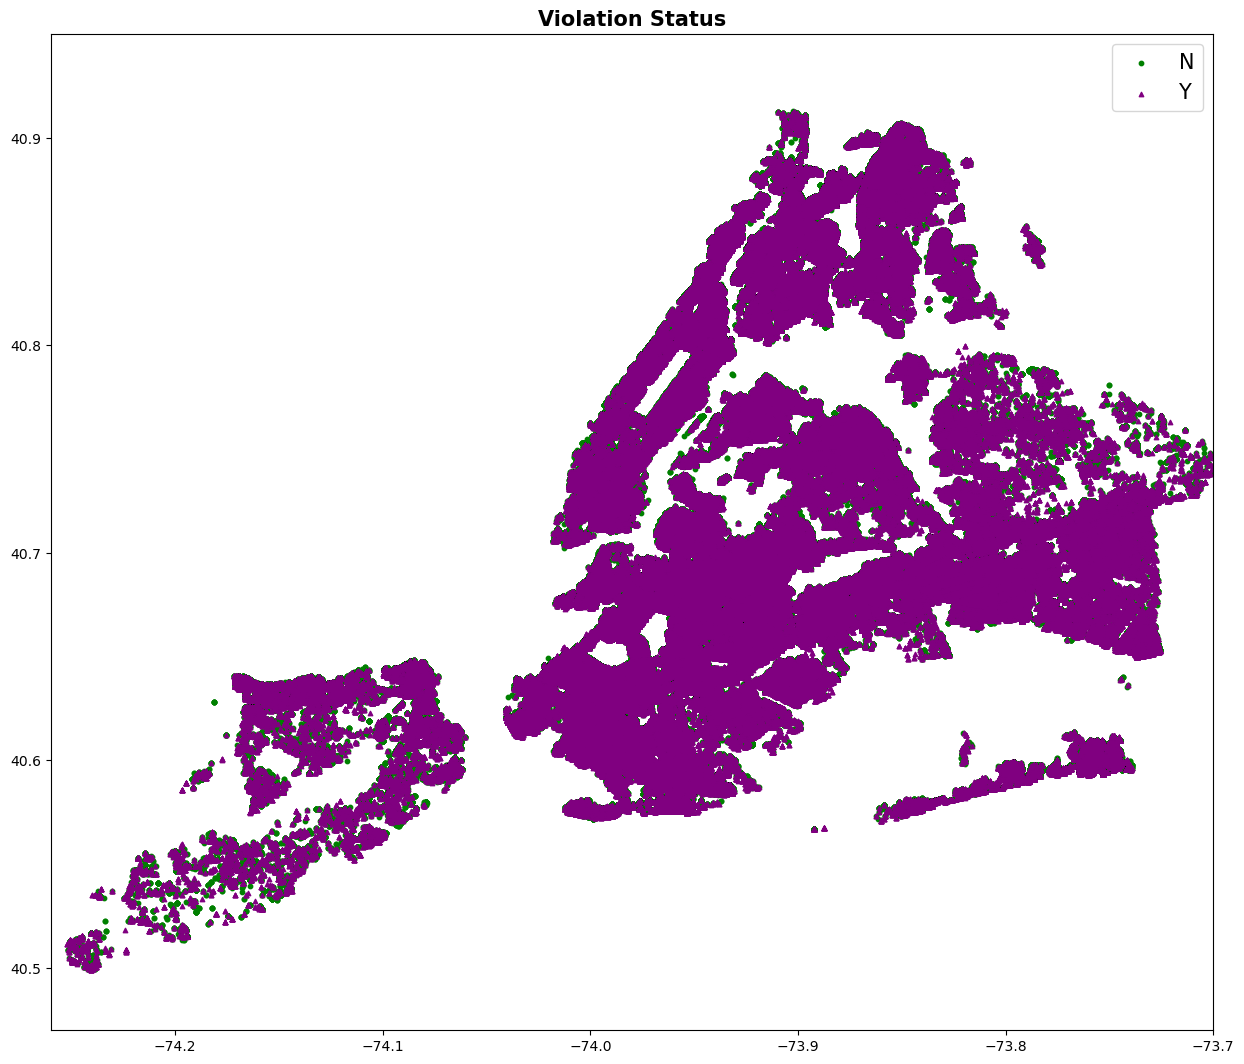

In [39]:
fig, ax = plt.subplots(figsize=(15,15))
censusTract_map.plot(ax=ax, alpha=0.4, color='grey')

geo_df[geo_df['ViolationStatus'] == 'Close'].plot(ax=ax,
                                             markersize=10,
                                             color='green', 
                                             marker='o',
                                             label='N')
geo_df[geo_df['ViolationStatus'] == 'Open'].plot(ax=ax, 
                                             markersize = 10,
                                             color = 'purple',
                                              marker='^',
                                            label='Y')
plt.legend(prop={'size':15})
plt.title('Violation Status', fontsize=15, fontweight='bold')

#latitude and longitude boundaries for map display - DEBUG
plt.xlim(-74.26,-73.7)
plt.ylim(40.47,40.95)

#show map
plt.show()


In [40]:
# visualizations - Question 1: Which boroughs do violations occur in the most overall?
df2['Borough'].value_counts()

BROOKLYN         3378821
BRONX            2393325
MANHATTAN        1716994
QUEENS           1006260
STATEN ISLAND     136585
Name: Borough, dtype: int64

Text(0.5, 1.0, 'Violations per Borough')

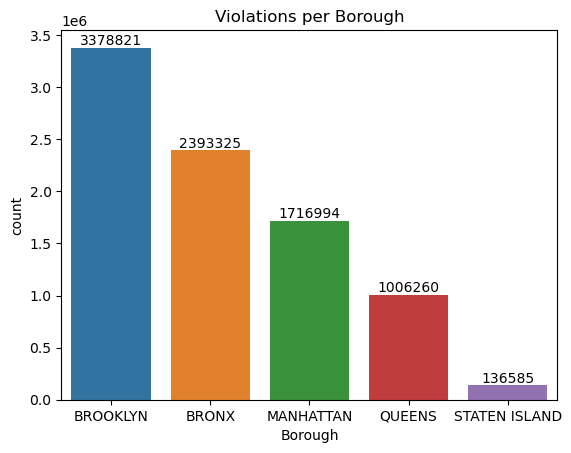

In [41]:
ax = sns.countplot(data=df2, x='Borough', order=df['Borough'].value_counts(ascending=False).index)
values = df2['Borough'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0],labels=values)
plt.title('Violations per Borough')
# add legend, add title

In [42]:
# visualizations - Question 2: What are the top 10 neighborhoods with the most violations?
df2['NTA'].value_counts().head(10)

Crown Heights North                  266435
Flatbush                             225771
Washington Heights South             186954
Prospect Lefferts Gardens-Wingate    168255
Mount Hope                           162147
Central Harlem North-Polo Grounds    152914
East Concourse-Concourse Village     147422
Hamilton Heights                     144356
Stuyvesant Heights                   142841
East New York                        138833
Name: NTA, dtype: int64

Text(0.5, 1.0, 'Top 10 Neighborhoods With the Most Violations')

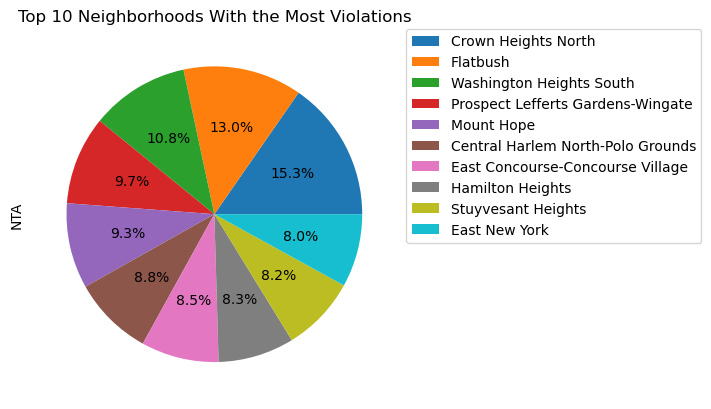

In [43]:
# debug - change visualization format
df2.NTA.value_counts().head(10).plot(kind='pie', legend=True,labeldistance=None,autopct='%.1f%%')
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title("Top 10 Neighborhoods With the Most Violations")
# add labels

In [44]:
# show geographic points

In [45]:
# What are the top 10 neighborhoods with the least violations?
df2['NTA'].value_counts().tail(10)

Bay Terrace-Clearview                   208
Arden Heights-Rossville                 158
Oakland Gardens-Hollis Hills            136
Douglaston-Little Neck                  131
Tottenville-Charleston                   65
Stuyvesant Town-Peter Cooper Village     31
Hutchinson Metro Center                  17
Flushing Meadows-Corona Park              4
park-cemetery-etc-Manhattan               3
Freshkills Park (South)                   1
Name: NTA, dtype: int64

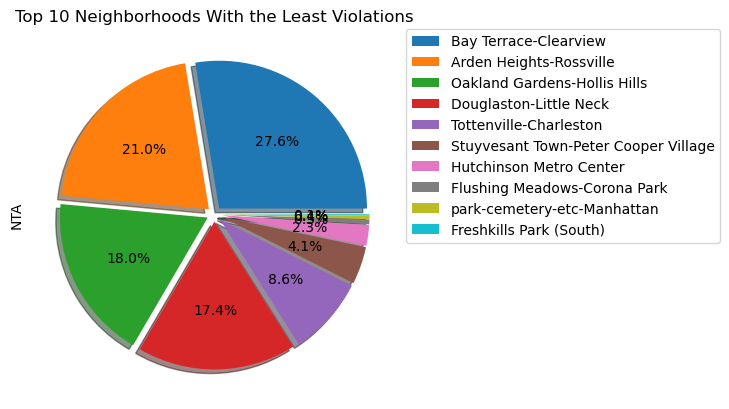

In [46]:
df2.NTA.value_counts().tail(10).plot(kind='pie', title = 'Top 10 Neighborhoods With the Least Violations', legend=True,labeldistance=None, autopct='%.1f%%',shadow=True,explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
# add labels

In [47]:
# show geographic points

In [48]:
# visualizations - Question 4: Which class of violation occurs the most?
df2['Class'].value_counts()
# classI violations are informational notices that do not have 
# certification periods associated; they indicate something
# about the status of the proeprty; that an Order is open against proeprty
# or that a property is vacant or that a property is not validity registered
# source

B    4218104
A    1938640
C    1806480
I     668761
Name: Class, dtype: int64

<Axes: title={'center': 'Class of Violation'}, ylabel='Class'>

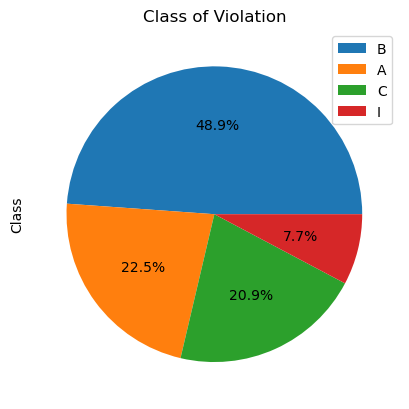

In [49]:
df2.Class.value_counts().plot(kind='pie',title='Class of Violation', legend=True, labeldistance=None, autopct='%.1f%%')
# DEBUG
#values = df2['Class'].value_counts().values
#ax2.bar_label(container=ax.containers[0], labels = values)

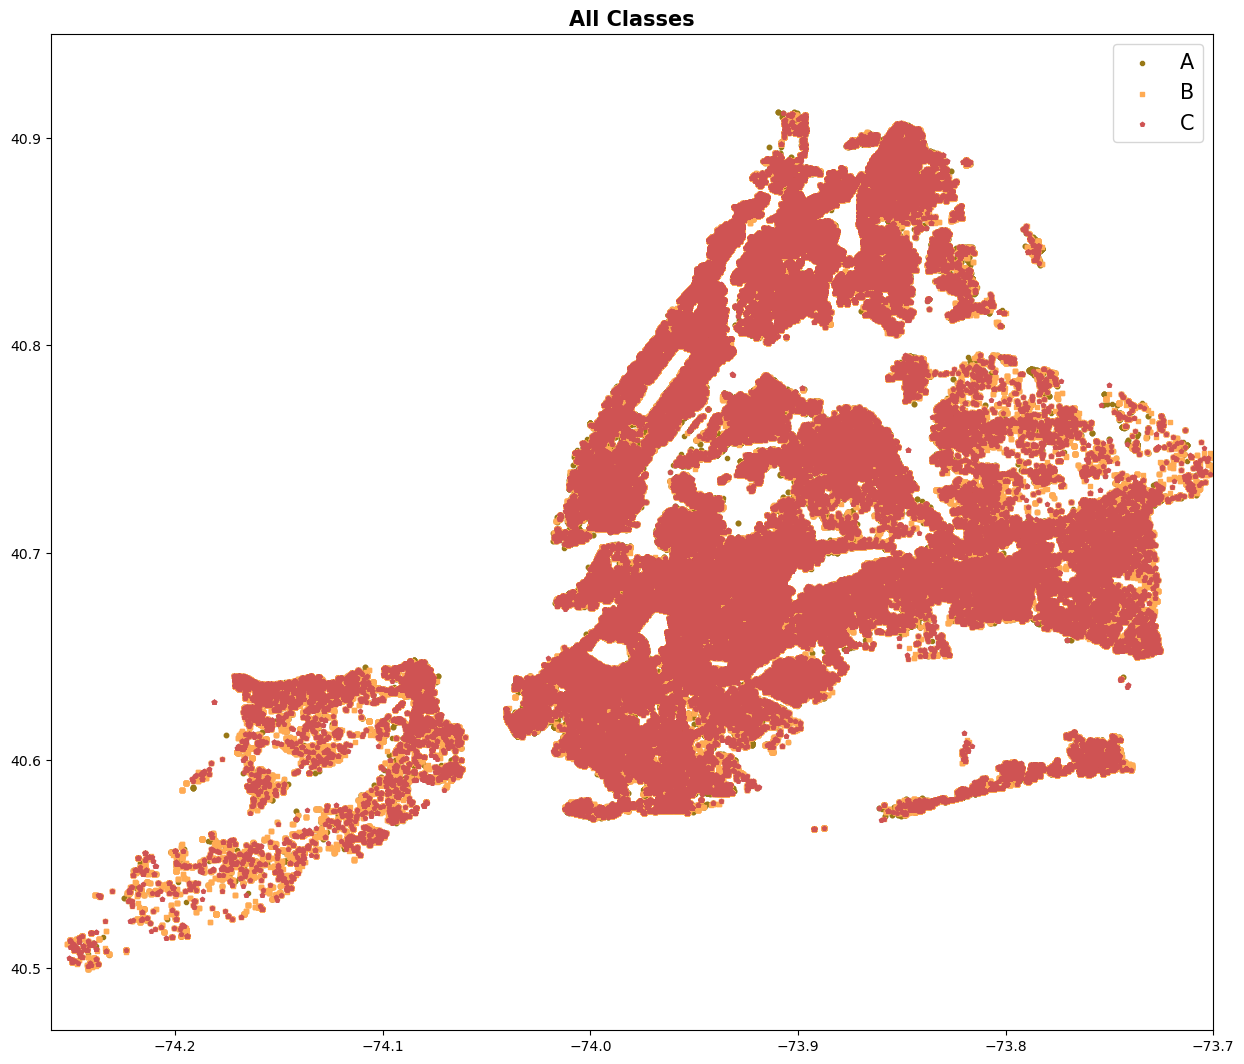

In [70]:
fig, ax = plt.subplots(figsize=(15,15))
NTA_map.plot(ax=ax, alpha=0.4, color='grey')

geo_df[geo_df['Class'] == 'A'].plot(ax=ax,
                                             markersize=10,
                                             color='#987816', 
                                             marker='8', # octagon
                                             label='A')
geo_df[geo_df['Class'] == 'B'].plot(ax=ax, 
                                             markersize = 10,
                                             color = '#ffab53',
                                              marker='s', #square
                                            label='B')

geo_df[geo_df['Class'] == 'C'].plot(ax=ax,
                                             markersize=10,
                                             color='#cf5353', 
                                             marker='p', #pentagon
                                             label='C')
#geo_df[geo_df['Class'] == 'I'].plot(ax=ax, 
                                             #markersize = 10,
                                             #color = '#5638a1',
                                              #marker='*', #star
                                            #label='I')

plt.legend(prop={'size':15})
plt.title('All Classes', fontsize=15, fontweight='bold')

#latitude and longitude boundaries for map display - DEBUG
plt.xlim(-74.26,-73.7)
plt.ylim(40.47,40.95)

#show map
plt.show()

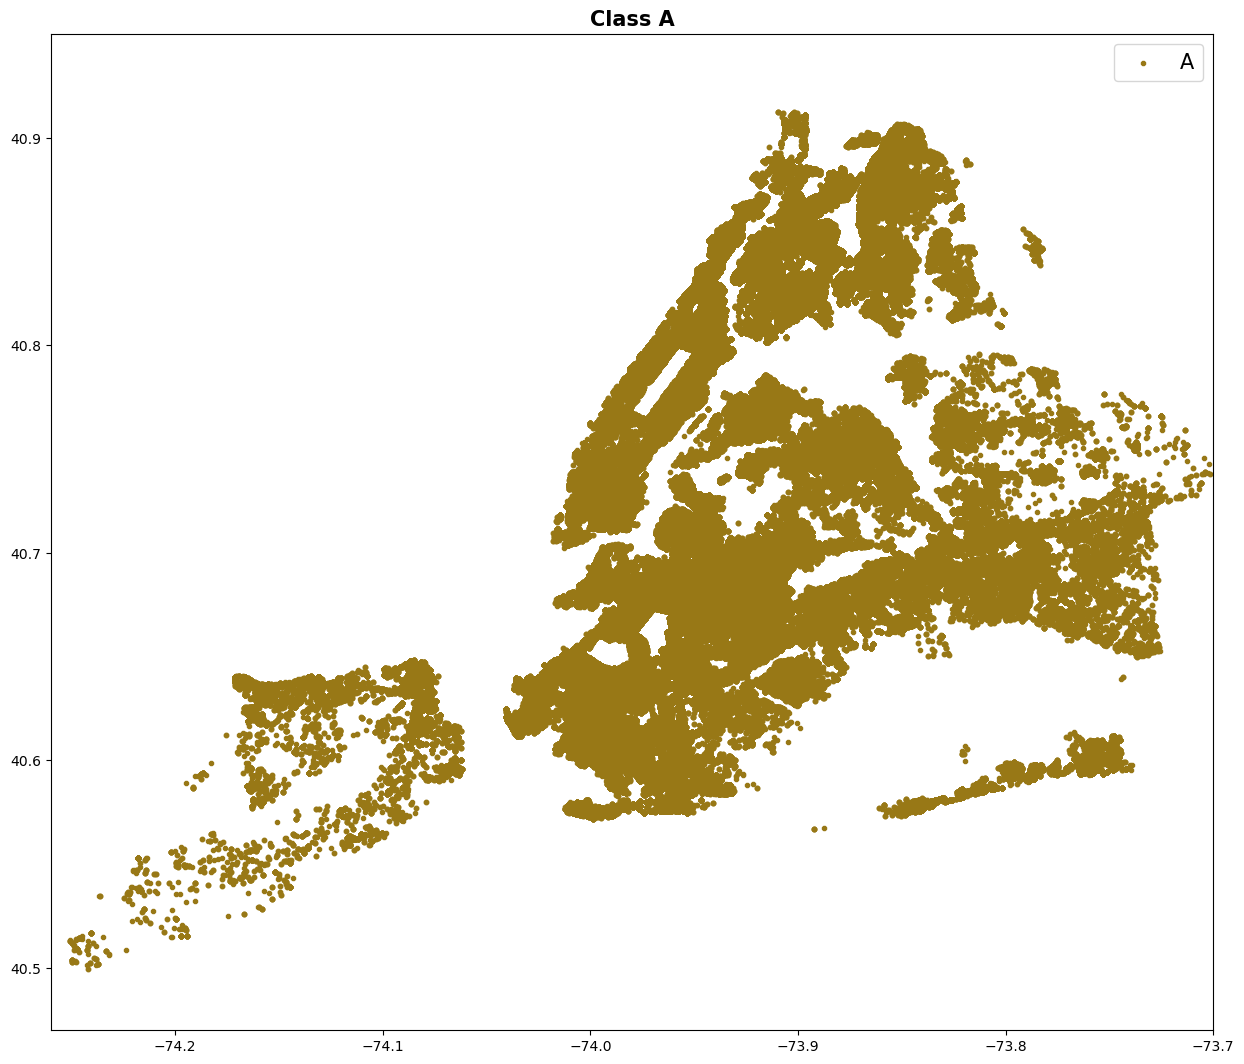

In [69]:
# neighborhoods with the most class A violations
fig, ax = plt.subplots(figsize=(15,15))
NTA_map.plot(ax=ax, alpha=0.4, color='grey')

geo_df[geo_df['Class'] == 'A'].plot(ax=ax,
                                             markersize=10,
                                             color='#987816', 
                                             marker='8', # octagon
                                             label='A')
#geo_df[geo_df['Class'] == 'B'].plot(ax=ax, 
                                             #markersize = 10,
                                             #color = 'purple',
                                              #marker='s', #square
                                            #label='B')

#geo_df[geo_df['Class'] == 'C'].plot(ax=ax,
                                             #markersize=10,
                                             #color='green', 
                                             #marker='p', #pentagon
                                             #label='C')
#geo_df[geo_df['Class'] == 'I'].plot(ax=ax, 
                                             #markersize = 10,
                                             #color = 'purple',
                                              #marker='*', #star
                                            #label='I')

plt.legend(prop={'size':15})
plt.title('Class A', fontsize=15, fontweight='bold')

#latitude and longitude boundaries for map display - DEBUG
plt.xlim(-74.26,-73.7)
plt.ylim(40.47,40.95)

#show map
plt.show()

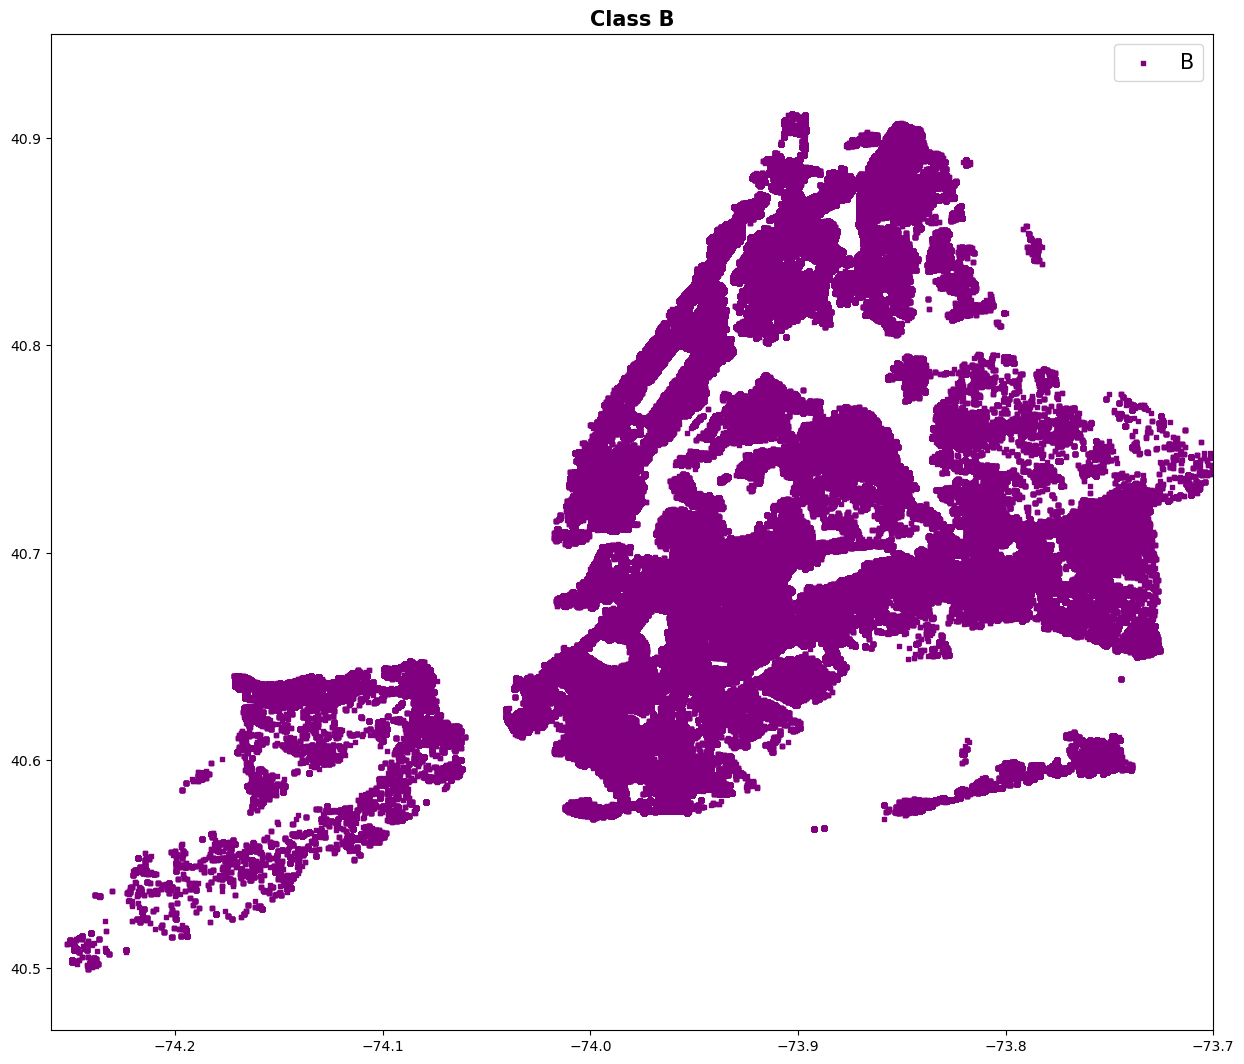

In [68]:
# neighborhoods with the most class B violations
fig, ax = plt.subplots(figsize=(15,15))
NTA_map.plot(ax=ax, alpha=0.4, color='grey')

#geo_df[geo_df['Class'] == 'A'].plot(ax=ax,
                                             #markersize=10,
                                             #color='green', 
                                             #marker='8', # octagon
                                             #label='A')
geo_df[geo_df['Class'] == 'B'].plot(ax=ax, 
                                             markersize = 10,
                                             color = 'purple',
                                              marker='s', #square
                                            label='B')

#geo_df[geo_df['Class'] == 'C'].plot(ax=ax,
                                             #markersize=10,
                                             #color='green', 
                                             #marker='p', #pentagon
                                             #label='C')
#geo_df[geo_df['Class'] == 'I'].plot(ax=ax, 
                                             #markersize = 10,
                                             #color = 'purple',
                                              #marker='*', #star
                                            #label='I')

plt.legend(prop={'size':15})
plt.title('Class B', fontsize=15, fontweight='bold')

#latitude and longitude boundaries for map display - DEBUG
plt.xlim(-74.26,-73.7)
plt.ylim(40.47,40.95)

#show map
plt.show()

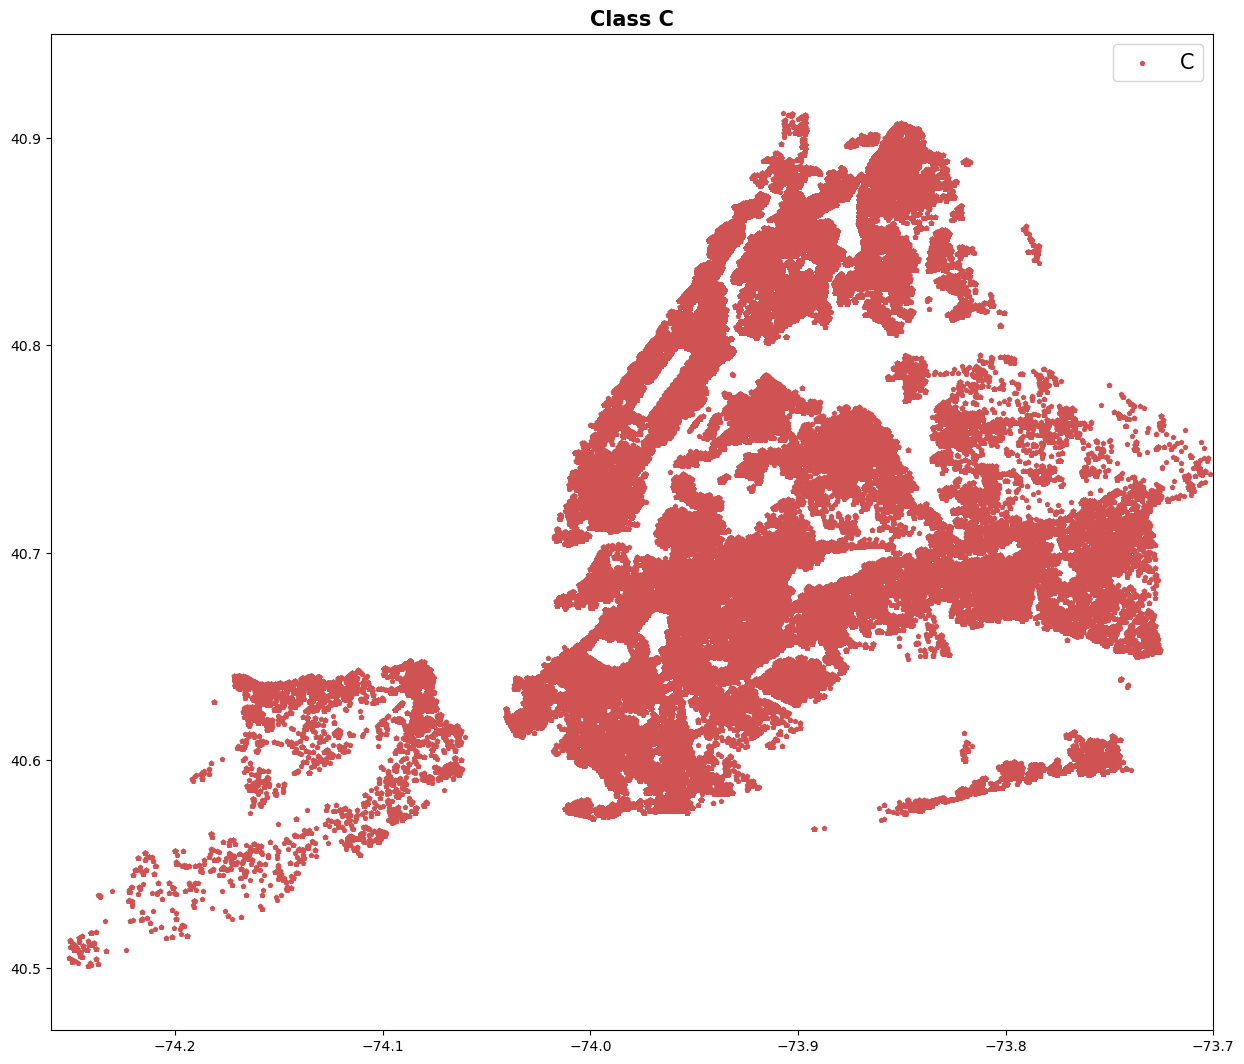

In [67]:
# neighborhoods with the most class C violations
fig, ax = plt.subplots(figsize=(15,15))
NTA_map.plot(ax=ax, alpha=0.4, color='grey')

#geo_df[geo_df['Class'] == 'A'].plot(ax=ax,
                                             #markersize=10,
                                             #color='green', 
                                             #marker='8', # octagon
                                             #label='A')
#geo_df[geo_df['Class'] == 'B'].plot(ax=ax, 
                                             #markersize = 10,
                                             #color = 'purple',
                                              #marker='s', #square
                                            #label='B')

geo_df[geo_df['Class'] == 'C'].plot(ax=ax,
                                             markersize=10,
                                             color='#cf5353', 
                                             marker='p', #pentagon
                                             label='C')
#geo_df[geo_df['Class'] == 'I'].plot(ax=ax, 
                                             #markersize = 10,
                                             #color = 'purple',
                                              #marker='*', #star
                                            #label='I')

plt.legend(prop={'size':15})
plt.title('Class C', fontsize=15, fontweight='bold')

#latitude and longitude boundaries for map display - DEBUG
plt.xlim(-74.26,-73.7)
plt.ylim(40.47,40.95)

#show map
plt.show()

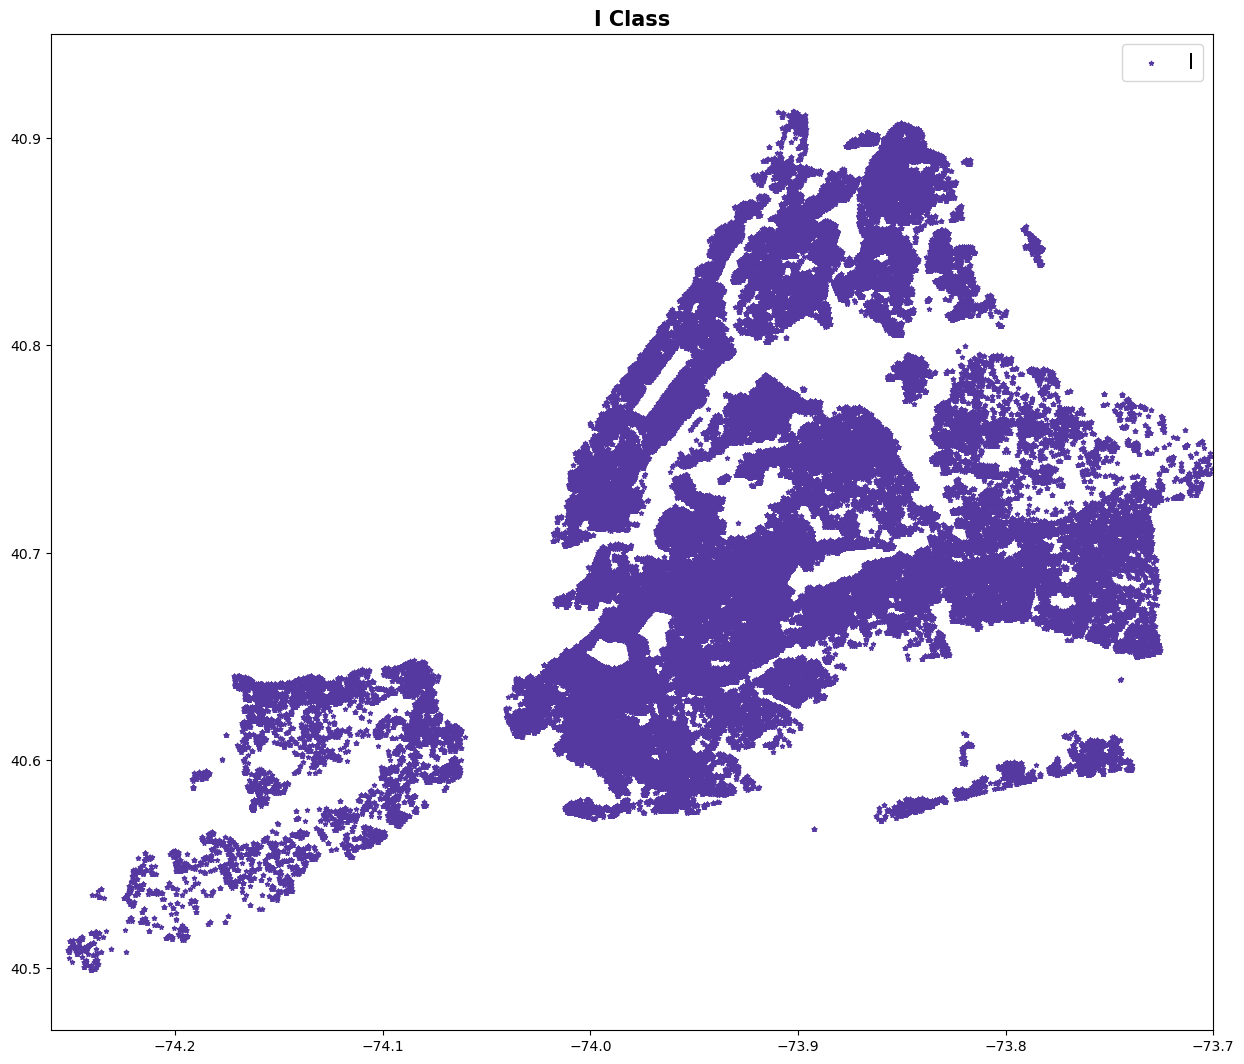

In [66]:
#neighborhoods with the most class I violations
fig, ax = plt.subplots(figsize=(15,15))
NTA_map.plot(ax=ax, alpha=0.4, color='grey')

#geo_df[geo_df['Class'] == 'A'].plot(ax=ax,
                                             #markersize=10,
                                             #color='green', 
                                             #marker='8', # octagon
                                             #label='A')
#geo_df[geo_df['Class'] == 'B'].plot(ax=ax, 
                                             #markersize = 10,
                                             #color = 'purple',
                                              #marker='s', #square
                                            #label='B')

#geo_df[geo_df['Class'] == 'C'].plot(ax=ax,
                                             #markersize=10,
                                             #color='green', 
                                             #marker='p', #pentagon
                                             #label='C')
geo_df[geo_df['Class'] == 'I'].plot(ax=ax, 
                                             markersize = 10,
                                             color = '#5638a1',
                                              marker='*', #star
                                            label='I')

plt.legend(prop={'size':15})
plt.title('I Class', fontsize=15, fontweight='bold')

#latitude and longitude boundaries for map display - DEBUG
plt.xlim(-74.26,-73.7)
plt.ylim(40.47,40.95)

#show map
plt.show()

In [55]:
# Which building did the most violations occur in?
df2['BuildingID'].value_counts()
    # Building ID: 111945

111945    4133
65537     3594
119285    3518
77561     3316
806375    3270
          ... 
192884       1
259008       1
313906       1
201808       1
406888       1
Name: BuildingID, Length: 225644, dtype: int64

In [56]:
buildingResults = df2.loc[df2['BuildingID'] == 111945]
buildingResults
    # 1149 Stratford Avenue, Bronx, NY 10472

ViolationID  BuildingID  RegistrationID Borough HouseNumber  \
6908        15184114      111945          205779   BRONX        1149   
6916        15184115      111945          205779   BRONX        1149   
6917        15184117      111945          205779   BRONX        1149   
6931        15184121      111945          205779   BRONX        1149   
9171        10227571      111945          205779   BRONX        1149   
...              ...         ...             ...     ...         ...   
8479758     16415116      111945          205779   BRONX        1149   
8575965     16346233      111945          205779   BRONX        1149   
8584056     16346232      111945          205779   BRONX        1149   
8618354     16372137      111945          205779   BRONX        1149   
8618355     16372138      111945          205779   BRONX        1149   

               StreetName  StreetCode Postcode Apartment Story  ...  \
6908     STRATFORD AVENUE       67120  10472.0        3I     4  ...   
6916     STRATFORD AVENUE       67120  10472.0        3I     4  ...   
6917     STRATFORD AVENUE       67120  10472.0        3I     4  ...   
6931     STRATFORD AVENUE       67120  10472.0        3I     4  ...   
9171     STRATFORD AVENUE       67120  10472.0        4J     5  ...   
...                   ...         ...      ...       ...   ...  ...   
8479758  STRATFORD AVENUE       67120  10472.0       NaN     0  ...   
8575965  STRATFORD AVENUE       67120  10472.0       NaN   1.0  ...   
8584056  STRATFORD AVENUE       67120  10472.0       NaN   1.0  ...   
8618354  STRATFORD AVENUE       67120  10472.0         G   1.0  ...   
8618355  STRATFORD AVENUE       67120  10472.0         G   1.0  ...   

         CurrentStatusDate   NovType ViolationStatus RentImpairing   Latitude  \
6908                   NaT  Original            Open             N  40.827966   
6916                   NaT  Original           Close             N  40.827966   
6917                   NaT  Original           Close             N  40.827966   
6931                   NaT  Original           Close             N  40.827966   
9171                   NaT  Original           Close             N  40.827966   
...                    ...       ...             ...           ...        ...   
8479758                NaT  Original            Open             N  40.827966   
8575965                NaT  Original            Open             N  40.827966   
8584056                NaT  Original            Open             N  40.827966   
8618354                NaT  Original            Open             N  40.827966   
8618355                NaT  Original            Open             N  40.827966   

         Longitude CommunityBoard  CouncilDistrict CensusTract  \
6908    -73.875222            9.0             18.0        48.0   
6916    -73.875222            9.0             18.0        48.0   
6917    -73.875222            9.0             18.0        48.0   
6931    -73.875222            9.0             18.0        48.0   
9171    -73.875222            9.0             18.0        48.0   
...            ...            ...              ...         ...   
8479758 -73.875222            9.0             18.0        48.0   
8575965 -73.875222            9.0             18.0        48.0   
8584056 -73.875222            9.0             18.0        48.0   
8618354 -73.875222            9.0             18.0        48.0   
8618355 -73.875222            9.0             18.0        48.0   

                                    NTA  
6908                 Soundview-Bruckner  
6916                 Soundview-Bruckner  
6917                 Soundview-Bruckner  
6931                 Soundview-Bruckner  
9171                 Soundview-Bruckner  
...                                 ...  
8479758  Soundview-Bruckner-Bronx River  
8575965  Soundview-Bruckner-Bronx River  
8584056  Soundview-Bruckner-Bronx River  
8618354  Soundview-Bruckner-Bronx River  
8618355  Soundview-Bruckner-Bronx River  

[4133 rows x 32 colu

In [57]:
# 65537
buildingResults = df2.loc[df2['BuildingID'] == 65537]
buildingResults
    # 1742 East 172 Street, Bronx, NY 10472

ViolationID  BuildingID  RegistrationID Borough HouseNumber  \
83252       14360732       65537          207907   BRONX        1742   
83363       14360787       65537          207907   BRONX        1742   
83373       14360804       65537          207907   BRONX        1742   
86953       14427153       65537          207907   BRONX        1742   
92067       14525832       65537          207907   BRONX        1742   
...              ...         ...             ...     ...         ...   
8618770     16397510       65537          207907   BRONX        1742   
8618771     16397511       65537          207907   BRONX        1742   
8618772     16397512       65537          207907   BRONX        1742   
8618773     16397513       65537          207907   BRONX        1742   
8618774     16397514       65537          207907   BRONX        1742   

              StreetName  StreetCode Postcode Apartment Story  ...  \
83252    EAST 172 STREET       26820  10472.0        3S     3  ...   
83363    EAST 172 STREET       26820  10472.0       NaN     0  ...   
83373    EAST 172 STREET       26820  10472.0       NaN     0  ...   
86953    EAST 172 STREET       26820  10472.0        3S     3  ...   
92067    EAST 172 STREET       26820  10472.0       NaN     0  ...   
...                  ...         ...      ...       ...   ...  ...   
8618770  EAST 172 STREET       26820  10472.0        6M   6.0  ...   
8618771  EAST 172 STREET       26820  10472.0        6M   6.0  ...   
8618772  EAST 172 STREET       26820  10472.0        6M   6.0  ...   
8618773  EAST 172 STREET       26820  10472.0        6M   6.0  ...   
8618774  EAST 172 STREET       26820  10472.0        6M   6.0  ...   

         CurrentStatusDate   NovType ViolationStatus RentImpairing   Latitude  \
83252                  NaT  Original           Close             N  40.832584   
83363                  NaT  Original           Close             N  40.832584   
83373                  NaT  Original           Close             Y  40.832584   
86953                  NaT  Original           Close             N  40.832584   
92067                  NaT  Original           Close             Y  40.832584   
...                    ...       ...             ...           ...        ...   
8618770                NaT  Original            Open             N  40.832584   
8618771                NaT  Original            Open             N  40.832584   
8618772                NaT  Original            Open             N  40.832584   
8618773                NaT  Original            Open             N  40.832584   
8618774                NaT  Original            Open             N  40.832584   

         Longitude CommunityBoard  CouncilDistrict CensusTract  \
83252   -73.869201            9.0             18.0        76.0   
83363   -73.869201            9.0             18.0        76.0   
83373   -73.869201            9.0             18.0        76.0   
86953   -73.869201            9.0             18.0        76.0   
92067   -73.869201            9.0             18.0        76.0   
...            ...            ...              ...         ...   
8618770 -73.869201            9.0             18.0        76.0   
8618771 -73.869201            9.0             18.0        76.0   
8618772 -73.869201            9.0             18.0        76.0   
8618773 -73.869201            9.0             18.0        76.0   
8618774 -73.869201            9.0             18.0        76.0   

                                    NTA  
83252    Soundview-Bruckner-Bronx River  
83363    Soundview-Bruckner-Bronx River  
83373    Soundview-Bruckner-Bronx River  
86953    Soundview-Bruckner-Bronx River  
92067    Soundview-Bruckner-Bronx River  
...                                 ...  
8618770  Soundview-Bruckner-Bronx River  
8618771  Soundview-Bruckner-Bronx River  
8618772  Soundview-Bruckner-Bronx River  
8618773  Soundview-Bruckner-Bronx River  
8618774  Soundview-Bruckner-Bronx River  

[3594 rows x 32 columns]

In [58]:
# 119285
buildingResults = df2.loc[df2['BuildingID'] == 119285]
buildingResults
    # 975 Walton Avenue, Bronx, NY 10452

ViolationID  BuildingID  RegistrationID Borough HouseNumber  \
29763       14379490      119285          201131   BRONX         975   
48798       13938572      119285          201131   BRONX         975   
64775       14646986      119285          201131   BRONX         975   
64776       14646991      119285          201131   BRONX         975   
64779       14646987      119285          201131   BRONX         975   
...              ...         ...             ...     ...         ...   
8603730     16123349      119285          201131   BRONX         975   
8604124     16162595      119285          201131   BRONX         975   
8604535     16244308      119285          201131   BRONX         975   
8604536     16244312      119285          201131   BRONX         975   
8615651     16378627      119285          201131   BRONX         975   

            StreetName  StreetCode Postcode Apartment Story  ...  \
29763    WALTON AVENUE       72720  10452.0       3BS     3  ...   
48798    WALTON AVENUE       72720  10452.0       3AN     3  ...   
64775    WALTON AVENUE       72720  10452.0       4BS     4  ...   
64776    WALTON AVENUE       72720  10452.0       1FS     1  ...   
64779    WALTON AVENUE       72720  10452.0       4HS     4  ...   
...                ...         ...      ...       ...   ...  ...   
8603730  WALTON AVENUE       72720  10452.0       2GN   2.0  ...   
8604124  WALTON AVENUE       72720  10452.0       5MN   5.0  ...   
8604535  WALTON AVENUE       72720  10452.0    6DSOUT   6.0  ...   
8604536  WALTON AVENUE       72720  10452.0    6DSOUT   6.0  ...   
8615651  WALTON AVENUE       72720  10452.0       NaN   1.0  ...   

         CurrentStatusDate   NovType ViolationStatus RentImpairing   Latitude  \
29763                  NaT  Original           Close             N  40.829399   
48798                  NaT  Original           Close             N  40.829399   
64775                  NaT  Original            Open             N  40.829399   
64776                  NaT  Original            Open             N  40.829399   
64779                  NaT  Original           Close             N  40.829399   
...                    ...       ...             ...           ...        ...   
8603730                NaT  Original            Open             N  40.829399   
8604124                NaT  Original           Close             N  40.829399   
8604535                NaT  Original            Open             N  40.829399   
8604536                NaT  Original            Open             N  40.829399   
8615651                NaT  Original            Open             N  40.829399   

         Longitude CommunityBoard  CouncilDistrict CensusTract  \
29763   -73.922802            4.0              8.0       195.0   
48798   -73.922802            4.0              8.0       195.0   
64775   -73.922802            4.0              8.0       195.0   
64776   -73.922802            4.0              8.0       195.0   
64779   -73.922802            4.0              8.0       195.0   
...            ...            ...              ...         ...   
8603730 -73.922802            4.0             16.0       195.0   
8604124 -73.922802            4.0              8.0       195.0   
8604535 -73.922802            4.0              8.0       195.0   
8604536 -73.922802            4.0              8.0       195.0   
8615651 -73.922802            4.0             16.0       195.0   

                                 NTA  
29763                 West Concourse  
48798                 West Concourse  
64775                 West Concourse  
64776                 West Concourse  
64779                 West Concourse  
...                              ...  
8603730  Concourse-Concourse Village  
8604124  Concourse-Concourse Village  
8604535  Concourse-Concourse Village  
8604536  Concourse-Concourse Village  
8615651  Concourse-Concourse Village  

[3518 rows x 32 columns]

In [59]:
# 77561
buildingResults = df2.loc[df2['BuildingID'] == 77561]
buildingResults
    # 709 Fairmont Place, Bronx NY, 10457

ViolationID  BuildingID  RegistrationID Borough HouseNumber  \
17526       10245213       77561          201115   BRONX         709   
103988      15185735       77561          201115   BRONX         709   
114735      15265062       77561          201115   BRONX         709   
115759      15282454       77561          201115   BRONX         709   
116348      15300190       77561          201115   BRONX         709   
...              ...         ...             ...     ...         ...   
8598645     16413838       77561          201115   BRONX         709   
8598666     16413864       77561          201115   BRONX         709   
8598667     16413865       77561          201115   BRONX         709   
8602680     16296308       77561          201115   BRONX         709   
8618241     16362589       77561          201115   BRONX         709   

              StreetName  StreetCode Postcode Apartment Story  ...  \
17526    FAIRMOUNT PLACE       32120  10457.0       NaN     5  ...   
103988   FAIRMOUNT PLACE       32120  10457.0        E5     5  ...   
114735   FAIRMOUNT PLACE       32120  10457.0       NaN     1  ...   
115759   FAIRMOUNT PLACE       32120  10457.0       NaN     1  ...   
116348   FAIRMOUNT PLACE       32120  10457.0       NaN     1  ...   
...                  ...         ...      ...       ...   ...  ...   
8598645  FAIRMOUNT PLACE       32120  10457.0        A7   1.0  ...   
8598666  FAIRMOUNT PLACE       32120  10457.0        A7   1.0  ...   
8598667  FAIRMOUNT PLACE       32120  10457.0        A7   1.0  ...   
8602680  FAIRMOUNT PLACE       32120  10457.0       NaN   5.0  ...   
8618241  FAIRMOUNT PLACE       32120  10457.0        E5   5.0  ...   

         CurrentStatusDate   NovType ViolationStatus RentImpairing   Latitude  \
17526                  NaT  Original           Close             N  40.844174   
103988                 NaT  Original           Close             N  40.844174   
114735                 NaT  Original           Close             N  40.844174   
115759                 NaT  Original           Close             N  40.844174   
116348                 NaT  Original           Close             N  40.844174   
...                    ...       ...             ...           ...        ...   
8598645                NaT  Original            Open             N  40.844174   
8598666                NaT  Original            Open             N  40.844174   
8598667                NaT  Original            Open             N  40.844174   
8602680                NaT  Original           Close             N  40.844174   
8618241                NaT  Original            Open             N  40.844174   

        Longitude CommunityBoard  CouncilDistrict CensusTract           NTA  
17526   -73.89167            6.0             15.0     36901.0       Tremont  
103988  -73.89167            6.0             17.0     36901.0  East Tremont  
114735  -73.89167            6.0             15.0     36901.0       Tremont  
115759  -73.89167            6.0             15.0     36901.0       Tremont  
116348  -73.89167            6.0             17.0     36901.0       Tremont  
...           ...            ...              ...         ...           ...  
8598645 -73.89167            6.0             17.0     36901.0       Tremont  
8598666 -73.89167            6.0             17.0     36901.0       Tremont  
8598667 -73.89167            6.0             17.0     36901.0       Tremont  
8602680 -73.89167            6.0             17.0     36901.0       Tremont  
8618241 -73.89167            6.0             17.0     36901.0       Tremont  

[3316 rows x 32 columns]

In [60]:
# 806375
buildingResults = df2.loc[df2['BuildingID'] == 806375]
buildingResults
    # 1259 Clay Avenue, Bronx, NY 10456

ViolationID  BuildingID  RegistrationID Borough HouseNumber  \
13516       10322774      806375          203973   BRONX        1259   
16070       11815165      806375          203973   BRONX        1259   
55508       14479146      806375          203973   BRONX        1259   
57051       14480617      806375          203973   BRONX        1259   
63459       13972218      806375          203973   BRONX        1259   
...              ...         ...             ...     ...         ...   
8586939     16501030      806375          203973   BRONX        1259   
8586940     16501031      806375          203973   BRONX        1259   
8586941     16501032      806375          203973   BRONX        1259   
8586942     16501036      806375          203973   BRONX        1259   
8587772     16501037      806375          203973   BRONX        1259   

          StreetName  StreetCode Postcode Apartment Story  ...  \
13516    CLAY AVENUE       20020  10456.0        4B     4  ...   
16070    CLAY AVENUE       20020  10456.0         B     1  ...   
55508    CLAY AVENUE       20020  10456.0        1B     2  ...   
57051    CLAY AVENUE       20020  10456.0        5A     6  ...   
63459    CLAY AVENUE       20020  10456.0        3B     3  ...   
...              ...         ...      ...       ...   ...  ...   
8586939  CLAY AVENUE       20020  10456.0        3C   4.0  ...   
8586940  CLAY AVENUE       20020  10456.0        3C   4.0  ...   
8586941  CLAY AVENUE       20020  10456.0        3C   4.0  ...   
8586942  CLAY AVENUE       20020  10456.0       NaN   0.0  ...   
8587772  CLAY AVENUE       20020  10456.0       NaN   2.0  ...   

         CurrentStatusDate   NovType ViolationStatus RentImpairing   Latitude  \
13516                  NaT  Original           Close             N  40.833578   
16070                  NaT  Original           Close             N  40.833578   
55508                  NaT  Original           Close             N  40.833578   
57051                  NaT  Original            Open             N  40.833578   
63459                  NaT  Original           Close             N  40.833578   
...                    ...       ...             ...           ...        ...   
8586939                NaT       NaN            Open             N  40.833578   
8586940                NaT       NaN            Open             N  40.833578   
8586941                NaT       NaN            Open             N  40.833578   
8586942                NaT       NaN            Open             N  40.833578   
8587772                NaT       NaN            Open             N  40.833578   

        Longitude CommunityBoard  CouncilDistrict CensusTract  \
13516   -73.90994            4.0             16.0     17701.0   
16070   -73.90994            4.0             16.0     17701.0   
55508   -73.90994            4.0             16.0     17701.0   
57051   -73.90994            4.0             16.0     17701.0   
63459   -73.90994            4.0             16.0     17701.0   
...           ...            ...              ...         ...   
8586939 -73.90994            4.0             16.0     17701.0   
8586940 -73.90994            4.0             16.0     17701.0   
8586941 -73.90994            4.0             16.0     17701.0   
8586942 -73.90994            4.0             16.0     17701.0   
8587772 -73.90994            4.0             16.0     17701.0   

                                      NTA  
13516    East Concourse-Concourse Village  
16070    East Concourse-Concourse Village  
55508    East Concourse-Concourse Village  
57051    East Concourse-Concourse Village  
63459    East Concourse-Concourse Village  
...                                   ...  
8586939       Concourse-Concourse Village  
8586940       Concourse-Concourse Village  
8586941       Concourse-Concourse Village  
8586942       Concourse-Concourse Village  
8587772       Concourse-Concourse Village  

[3270 rows x 32 columns]

In [61]:
df2['ViolationStatus'].value_counts()

Close    5977990
Open     2653995
Name: ViolationStatus, dtype: int64

In [62]:
# Order Number: reference to the abstract description of the violation
# condition which cites a specific section of the law which is in violation
df2['OrderNumber'].value_counts()

508    796168
780    641864
502    528422
501    484143
556    435708
        ...  
586         1
230         1
849         1
655         1
135         1
Name: OrderNumber, Length: 724, dtype: int64

In [63]:
df2['OrderNumber'].value_counts().head(10)
    # source: https://hpdsigns.nyc/nyc-hpd-violation-description-by-code-number/
    # 508: 27-2005 ADM CODE REPAIR THE BROKEN OR DEFECTIVE PLASTERED SURFACES AND PAINT IN A UNIFORM COLOR
    # 780: 27-2107 ADM CODE OWNER FAILED TO FILE A VALID REGISTRATION STATEMENT WITH THE DEPARTMENT AS REQUIRED BY ADM CODE §27-2097 AND IS THEREFORE SUBJECT TO CIVIL PENALTIES, PROHIBITED FROM CERTIFYING VIOLATIONS, AND DENIED THE RIGHT TO RECOVER POSSESSION OF PREMISES FOR NONPAYMENT OF RENT UNTIL A VALID REGISTRATION STATEMENT IS FILED.
    # 502: 27-2005 ADM CODE PROPERLY REPAIR WITH SIMILAR MATERIAL THE BROKEN OR DEFECTIVE
    # 501: 27-2005 ADM CODE PROPERLY REPAIR THE BROKEN OR DEFECTIVE
    # 556: 27-2013 ADM CODE PAINT WITH LIGHT COLORED PAINT TO THE SATISFACTION OF THIS DEPARTMENT
    # 1507: related to bed bugs
    # 702: 27-2045 ADM CODE REPAIR OR REPLACE THE SMOKE DETECTOR
    # 550: 27-2005 HMC:TRACE AND REPAIR THE SOURCE AND ABATE THE NUISANCE CONSISTING OF MOLD ...
    # 530: 27-2005, 2007 ADM CODE ARRANGE AND MAKE SELF-CLOSING THE DOORS
    # 583: 27-2026, 2027 HMC: PROPERLY REPAIR THE SOURCE AND ABATE THE EVIDENCE OF A WATER LEAK

508     796168
780     641864
502     528422
501     484143
556     435708
1507    294437
702     284766
550     249781
530     240007
583     230025
Name: OrderNumber, dtype: int64

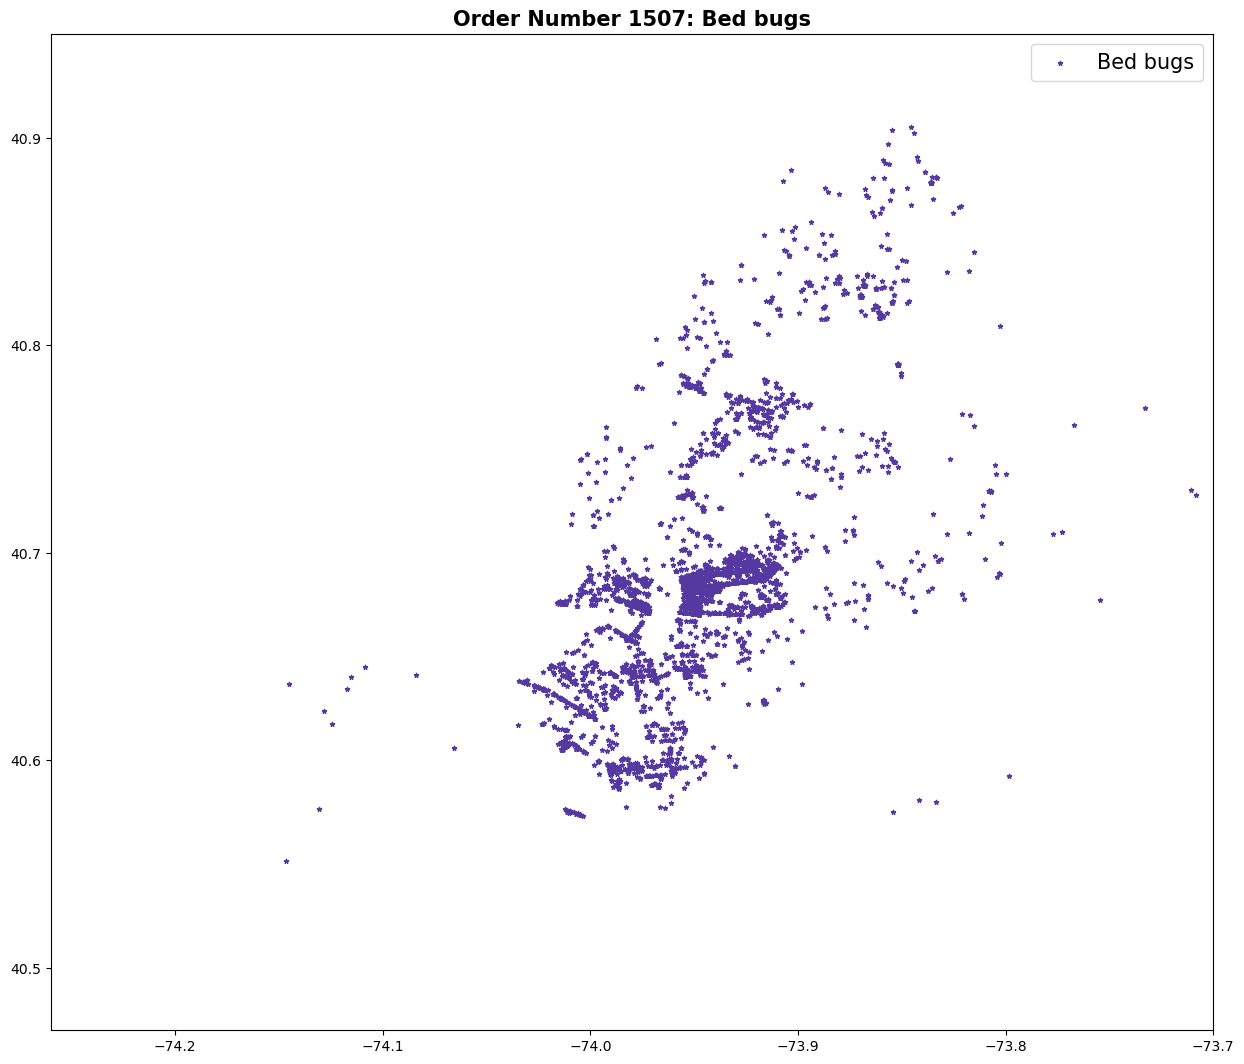

In [78]:
#neighborhoods with the most class I violations
fig, ax = plt.subplots(figsize=(15,15))
zipCode_map.plot(ax=ax, alpha=0.4, color='grey')

#geo_df[geo_df['Class'] == 'A'].plot(ax=ax,
                                             #markersize=10,
                                             #color='green', 
                                             #marker='8', # octagon
                                             #label='A')
#geo_df[geo_df['Class'] == 'B'].plot(ax=ax, 
                                             #markersize = 10,
                                             #color = 'purple',
                                              #marker='s', #square
                                            #label='B')

#geo_df[geo_df['Class'] == 'C'].plot(ax=ax,
                                             #markersize=10,
                                             #color='green', 
                                             #marker='p', #pentagon
                                             #label='C')
geo_df[geo_df['OrderNumber'] == '1507'].plot(ax=ax, 
                                             markersize = 10,
                                             color = '#5638a1',
                                              marker='*', #star
                                            label='Bed bugs')

plt.legend(prop={'size':15})
plt.title('Order Number 1507: Bed bugs', fontsize=15, fontweight='bold')

#latitude and longitude boundaries for map display - DEBUG
plt.xlim(-74.26,-73.7)
plt.ylim(40.47,40.95)

#show map
plt.show()

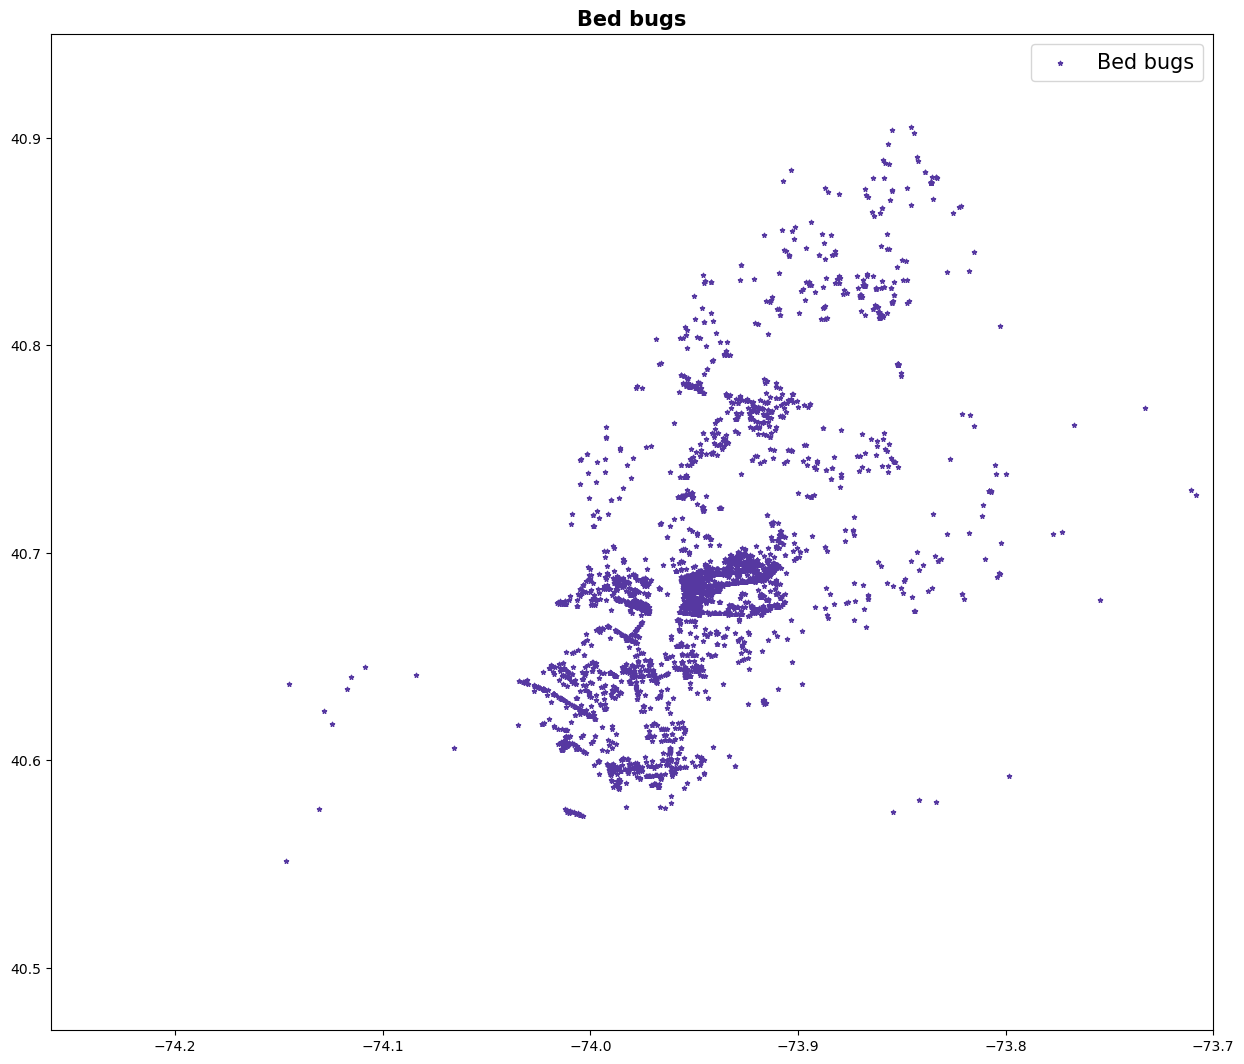

In [71]:
#neighborhoods with the most class I violations
fig, ax = plt.subplots(figsize=(15,15))
censusTract_map.plot(ax=ax, alpha=0.4, color='grey')

#geo_df[geo_df['Class'] == 'A'].plot(ax=ax,
                                             #markersize=10,
                                             #color='green', 
                                             #marker='8', # octagon
                                             #label='A')
#geo_df[geo_df['Class'] == 'B'].plot(ax=ax, 
                                             #markersize = 10,
                                             #color = 'purple',
                                              #marker='s', #square
                                            #label='B')

#geo_df[geo_df['Class'] == 'C'].plot(ax=ax,
                                             #markersize=10,
                                             #color='green', 
                                             #marker='p', #pentagon
                                             #label='C')
geo_df[geo_df['OrderNumber'] == '1507'].plot(ax=ax, 
                                             markersize = 10,
                                             color = '#5638a1',
                                              marker='*', #star
                                            label='Bed bugs')

plt.legend(prop={'size':15})
plt.title('Bed bugs', fontsize=15, fontweight='bold')

#latitude and longitude boundaries for map display - DEBUG
plt.xlim(-74.26,-73.7)
plt.ylim(40.47,40.95)

#show map
plt.show()

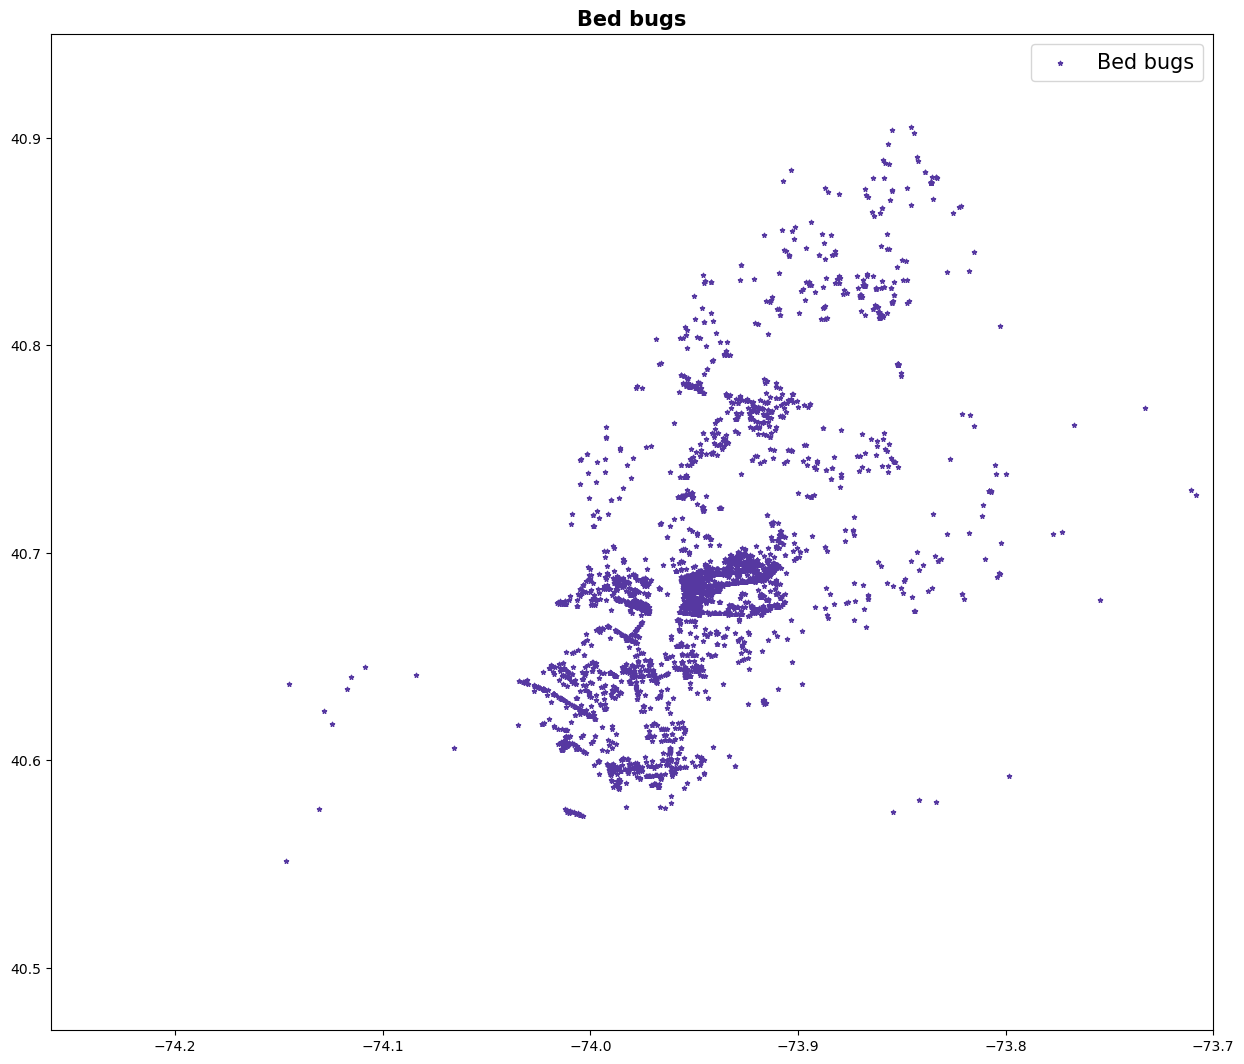

In [72]:
#neighborhoods with the most class I violations
fig, ax = plt.subplots(figsize=(15,15))
NTA_map.plot(ax=ax, alpha=0.4, color='grey')

#geo_df[geo_df['Class'] == 'A'].plot(ax=ax,
                                             #markersize=10,
                                             #color='green', 
                                             #marker='8', # octagon
                                             #label='A')
#geo_df[geo_df['Class'] == 'B'].plot(ax=ax, 
                                             #markersize = 10,
                                             #color = 'purple',
                                              #marker='s', #square
                                            #label='B')

#geo_df[geo_df['Class'] == 'C'].plot(ax=ax,
                                             #markersize=10,
                                             #color='green', 
                                             #marker='p', #pentagon
                                             #label='C')
geo_df[geo_df['OrderNumber'] == '1507'].plot(ax=ax, 
                                             markersize = 10,
                                             color = '#5638a1',
                                              marker='*', #star
                                            label='Bed bugs')

plt.legend(prop={'size':15})
plt.title('Bed bugs', fontsize=15, fontweight='bold')

#latitude and longitude boundaries for map display - DEBUG
plt.xlim(-74.26,-73.7)
plt.ylim(40.47,40.95)

#show map
plt.show()

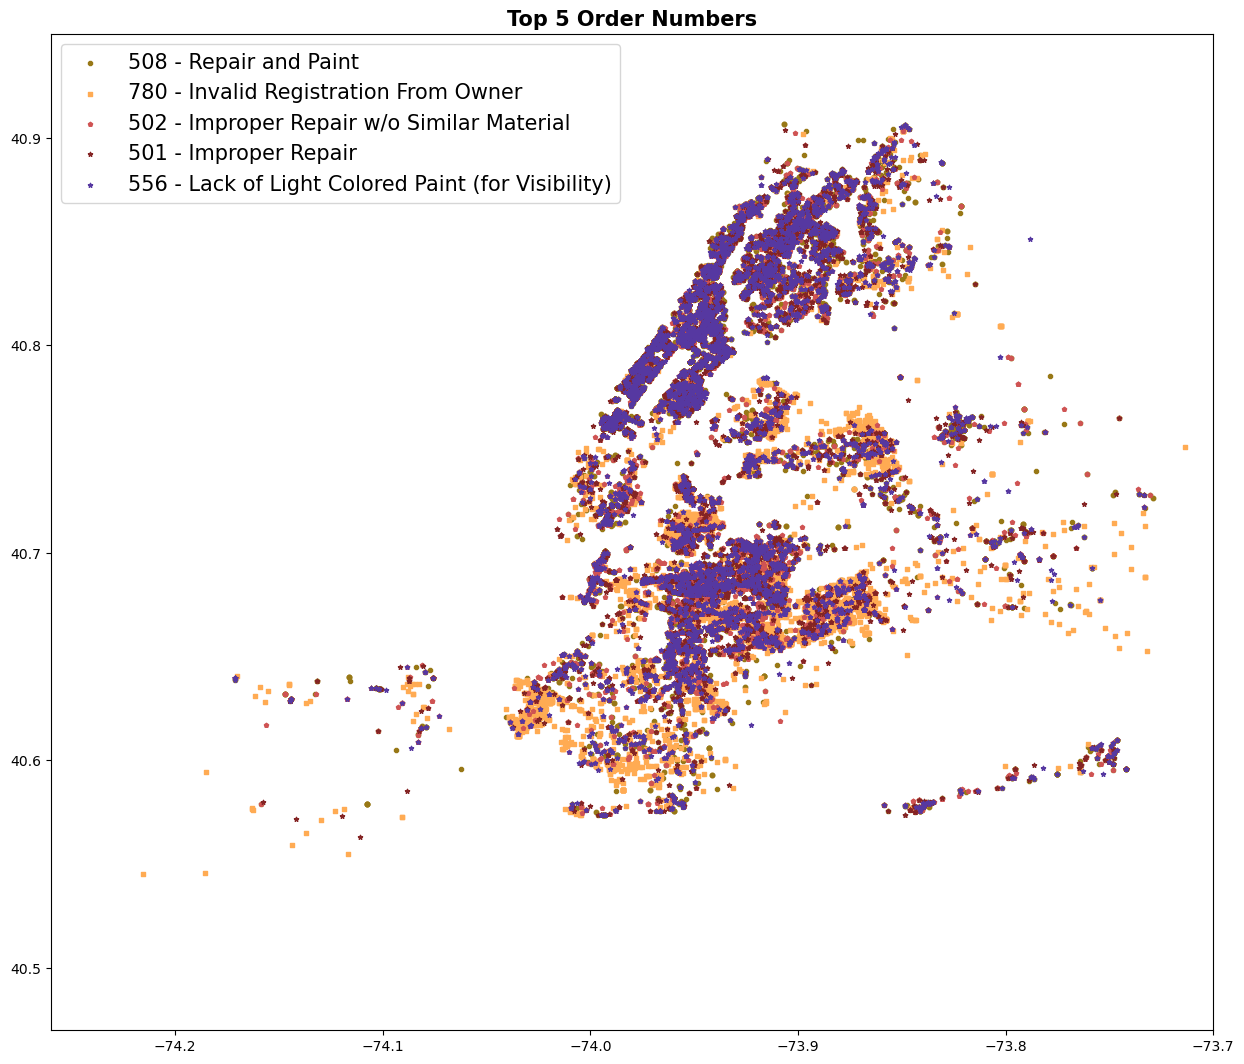

In [79]:
#508     796168
#780     641864
#502     528422
#501     484143
#556     435708


#neighborhoods with the most class I violations
fig, ax = plt.subplots(figsize=(15,15))
NTA_map.plot(ax=ax, alpha=0.4, color='grey')

geo_df[geo_df['OrderNumber'] == '508'].plot(ax=ax,
                                             markersize=10,
                                             color='#987816', 
                                             marker='8', # octagon
                                             label='508 - Repair and Paint')
geo_df[geo_df['OrderNumber'] == '780'].plot(ax=ax, 
                                             markersize = 10,
                                             color = '#ffab53',
                                              marker='s', #square
                                            label='780 - Invalid Registration From Owner')

geo_df[geo_df['OrderNumber'] == '502'].plot(ax=ax,
                                             markersize=10,
                                             color='#cf5353', 
                                             marker='p', #pentagon
                                             label='502 - Improper Repair w/o Similar Material')
geo_df[geo_df['OrderNumber'] == '501'].plot(ax=ax, 
                                             markersize = 10,
                                             color = '#842424',
                                              marker='*', #star
                                            label='501 - Improper Repair')
geo_df[geo_df['OrderNumber'] == '556'].plot(ax=ax, 
                                             markersize = 10,
                                             color = '#5638a1',
                                              marker='*', #star
                                            label='556 - Lack of Light Colored Paint (for Visibility)')

plt.legend(prop={'size':15})
plt.title('Top 5 Order Numbers', fontsize=15, fontweight='bold')

#latitude and longitude boundaries for map display - DEBUG
plt.xlim(-74.26,-73.7)
plt.ylim(40.47,40.95)

#show map
plt.show()

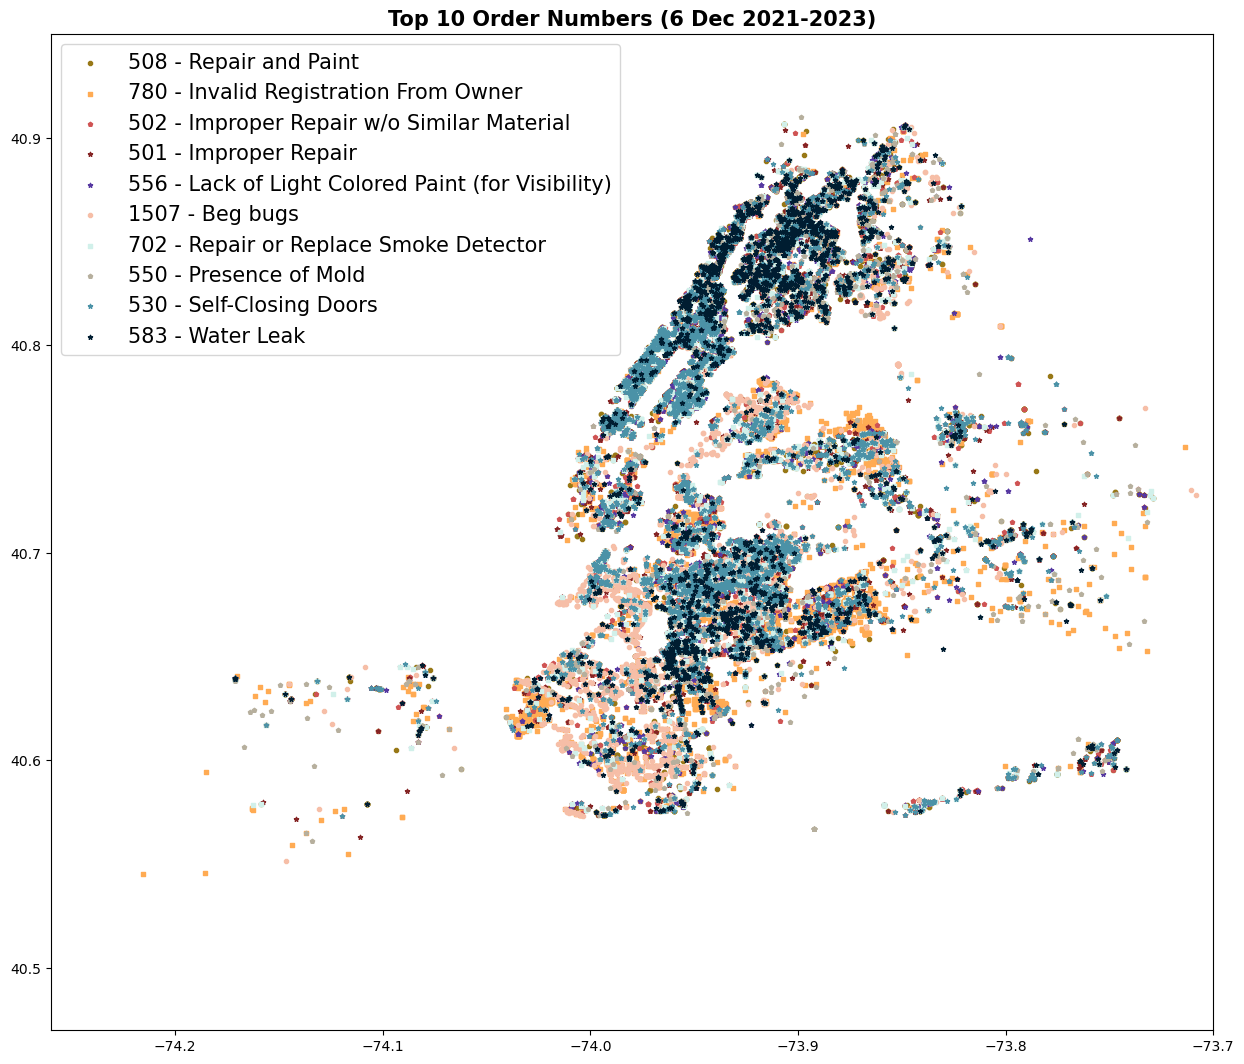

In [80]:
#neighborhoods with the most class I violations
fig, ax = plt.subplots(figsize=(15,15))
NTA_map.plot(ax=ax, alpha=0.4, color='grey')

geo_df[geo_df['OrderNumber'] == '508'].plot(ax=ax,
                                             markersize=10,
                                             color='#987816', 
                                             marker='8', # octagon
                                             label='508 - Repair and Paint')
geo_df[geo_df['OrderNumber'] == '780'].plot(ax=ax, 
                                             markersize = 10,
                                             color = '#ffab53',
                                              marker='s', #square
                                            label='780 - Invalid Registration From Owner')

geo_df[geo_df['OrderNumber'] == '502'].plot(ax=ax,
                                             markersize=10,
                                             color='#cf5353', 
                                             marker='p', #pentagon
                                             label='502 - Improper Repair w/o Similar Material')
geo_df[geo_df['OrderNumber'] == '501'].plot(ax=ax, 
                                             markersize = 10,
                                             color = '#842424',
                                              marker='*', #star
                                            label='501 - Improper Repair')
geo_df[geo_df['OrderNumber'] == '556'].plot(ax=ax, 
                                             markersize = 10,
                                             color = '#5638a1',
                                              marker='*', #star
                                            label='556 - Lack of Light Colored Paint (for Visibility)')


geo_df[geo_df['OrderNumber'] == '1507'].plot(ax=ax,
                                             markersize=10,
                                             color='#f6bea7', 
                                             marker='8', # octagon
                                             label='1507 - Beg bugs')
geo_df[geo_df['OrderNumber'] == '702'].plot(ax=ax, 
                                             markersize = 10,
                                             color = '#d1f0ea',
                                              marker='s', #square
                                            label='702 - Repair or Replace Smoke Detector')

geo_df[geo_df['OrderNumber'] == '550'].plot(ax=ax,
                                             markersize=10,
                                             color='#b6af9d', 
                                             marker='p', #pentagon
                                             label='550 - Presence of Mold')
geo_df[geo_df['OrderNumber'] == '530'].plot(ax=ax, 
                                             markersize = 10,
                                             color = '#4b92a7',
                                              marker='*', #star
                                            label='530 - Self-Closing Doors')
geo_df[geo_df['OrderNumber'] == '583'].plot(ax=ax, 
                                             markersize = 10,
                                             color = '#001d31',
                                              marker='*', #star
                                            label='583 - Water Leak')

plt.legend(prop={'size':15})
plt.title('Top 10 Order Numbers (6 Dec 2021-2023)', fontsize=15, fontweight='bold')

#latitude and longitude boundaries for map display - DEBUG
plt.xlim(-74.26,-73.7)
plt.ylim(40.47,40.95)

#show map
plt.show()